# RMD PST data Analysis

In [1]:
# Get the username and use that to set-up paths to data and figures
uname  = !whoami
uname = uname[0]
path2code = '/Users/' + uname + '/Work/Expts/Code/'
path2data = '/Users/' + uname + '/Work/Expts/REWMEM/Version4/Data/'
path2analysis = '/Users/' + uname + '/Work/Expts/REWMEM/Version4/Analysis/'
path2figs = '/Users/' + uname + '/Work/Expts/REWMEM/Version4/Analysis/Figures/PST/'

In [2]:
%cd {path2code}

import csv, misc, os, random, re, SelfRep
import numpy as np
import pandas as pd
import seaborn as sns
import scipy as sp
from matplotlib import pyplot as plt
%matplotlib inline
%load_ext rpy2.ipython

%R suppressMessages(library('lmerTest'))
%R suppressMessages(library('lsmeans'))
%R lsm.options(disable.pbkrtest=TRUE)
%R suppressMessages(library('effsize'))
%R suppressMessages(library('afex'))
%R suppressMessages(library('QuantPsyc')) 
%R suppressMessages(library('vcd'))

/Users/ebarrick/Work/Expts/Code


array(['vcd', 'grid', 'QuantPsyc', 'MASS', 'boot', 'afex', 'reshape2',
       'effsize', 'lsmeans', 'estimability', 'lmerTest', 'lme4', 'Matrix',
       'tools', 'stats', 'graphics', 'grDevices', 'utils', 'datasets',
       'methods', 'base'], 
      dtype='|S12')

In [3]:
def print_full(x):
    '''Print all rows of dataframe x'''
    pd.set_option('display.max_columns', None)
    pd.set_option('display.max_rows', None)
    return(x)

# Self Report

In [4]:
# Assemble self-report and demographics
pd.options.mode.chained_assignment = None

demo = SelfRep.demo_proc(path2data + 'RMD_SelfReport.xlsx')
cc = SelfRep.cc_proc(path2data + 'RMD_SelfReport.xlsx')
bb = SelfRep.bb_proc(path2data + 'RMD_SelfReport.xlsx')
bdi = SelfRep.bdi_proc(path2data + 'RMD_SelfReport.xlsx')
masq = SelfRep.masq_proc(path2data + 'RMD_SelfReport.xlsx')
aes = SelfRep.aes_proc(path2data + 'RMD_SelfReport.xlsx')
stai = SelfRep.stai_proc(path2data + 'RMD_SelfReport.xlsx')
shaps = SelfRep.shaps_proc(path2data + 'RMD_SelfReport.xlsx')
psqi = SelfRep.psqi_proc(path2data + 'RMD_SelfReport.xlsx')
tci = SelfRep.tci_proc(path2data + 'RMD_SelfReport.xlsx')
neo = SelfRep.neo_proc(path2data + 'RMD_SelfReport.xlsx')
poms = SelfRep.poms_proc(path2data + 'RMD_SelfReport.xlsx')
wtar = SelfRep.wtar_proc(path2data + 'RMD_SelfReport.xlsx')

sr = pd.merge(left=demo,right=bdi,left_on='subject',right_on='subject')
sr = pd.merge(left=sr,right=cc,left_on='subject',right_on='subject')
sr = pd.merge(left=sr,right=bb,left_on='subject',right_on='subject')
sr = pd.merge(left=sr,right=masq,left_on='subject',right_on='subject')
sr = pd.merge(left=sr,right=aes,left_on='subject',right_on='subject')
sr = pd.merge(left=sr,right=stai,left_on='subject',right_on='subject')
sr = pd.merge(left=sr,right=shaps,left_on='subject',right_on='subject')
sr = pd.merge(left=sr,right=psqi,left_on='subject',right_on='subject')
sr = pd.merge(left=sr,right=tci,left_on='subject',right_on='subject')
sr = pd.merge(left=sr,right=neo,left_on='subject',right_on='subject')
sr = pd.merge(left=sr,right=poms,left_on='subject',right_on='subject')
sr = pd.merge(left=sr,right=wtar,left_on='subject',right_on='subject')

In [5]:
sr = sr[sr.Eligible != 0]

In [6]:
demo.head()

Item,subject,Group,Age,Gender,Race,Ethnicity,Marital_Status,Education_Level,Education_Years,Occupation,Highest Degree,Income,Notes,Eligible
0,RMD001,Pilot,22,F,W,NH,Never Married,four year college,16,Intern,BA,<10K,NaN,0
1,RMD002,Pilot,22,F,W,NH,Never Married,four year college,16,research assistant,BA,25-50K,NaN,0
2,RMD003,MDD,43,F,W,NH,Separated,technical college,12,chef,NaN,NaN,NaN,1
3,RMD004,HC,37,M,W,NH,Never Married,four year college,16,Accountant,BS,10-25k,NaN,1
4,RMD005,HC,27,M,W,H,Never Married,graduate or professional school,17,Student,MA,<10K,NaN,1


In [7]:
print_full(sr)

Item,subject,Group,Age,Gender,Race,Ethnicity,Marital_Status,Education_Level,Education_Years,Occupation,Highest Degree,Income,Notes,Eligible,BDI_total,CC_total,BAS_D,BAS_FS,BAS_RR,BIS,MASQ_GDA,MASQ_AA,MASQ_GDD,MASQ_AD,AES_total,STAI_Trait,STAI_State,SHAPS,PSQI_Duration,PSQI_Disturb,PSQI_Latency,PSQI_DayDys,PSQI_Efficiency,PSQI_Quality,PSQI_Medication,PSQI_Total,TCI_NovSeek,TCI_HA,TCI_RewDep,TCI_Persist,TCI_SelfDir,TCI_CoOp,TCI_SelfTrans,TCI_Valid,NEO_N,NEO_E,NEO_O,NEO_A,NEO_C,POMS_TenseAnx,POMS_DepDeject,POMS_AngHost,POMS_VigorAct,POMS_FatigueInert,POMS_ConfuseBewild,POMS_TotalMoodDisturb,WTAR_NatEng,WTAR_StdScore
2,RMD003,MDD,43,F,W,NH,Separated,technical college,12.0,chef,NaN,NaN,NaN,1,18,13.00,14,13,19,25,23,18,28,91,44,41,68,2,1,2,2,0,1,1,1,8,67,93,75,77,54,50,35,valid,46,25,38,40,49,9,13,12,1,7,4,44,yes,96
3,RMD004,HC,37,M,W,NH,Never Married,four year college,16.0,Accountant,BS,10-25k,NaN,1,2,13.00,12,15,18,13,12,17,12,42,21,23,23,1,1,0,0,0,0,0,0,1,63,29,59,85,86,95,38,valid,14,47,44,48,49,0,0,0,15,3,2,-10,yes,105
4,RMD005,HC,27,M,W,H,Never Married,graduate or professional school,17.0,Student,MA,<10K,NaN,1,3,13.00,9,11,17,17,12,17,17,40,25,27,31,0,0,1,0,0,0,1,0,2,63,43,68,70,83,85,32,valid,27,45,38,47,42,3,2,1,11,1,4,0,yes,121
5,RMD006,HC,43,M,W,NH,Married or living with someone as if married,four year college,16.0,lab manager,BS,75-100K,NaN,1,0,12.50,11,10,18,18,11,17,12,36,18,20,21,0,0,1,0,0,0,0,0,1,54,43,72,78,78,74,44,valid,26,42,35,45,49,0,0,0,15,0,3,-12,yes,114
6,RMD007,HC,20,F,W,NH,Never Married,some college,14.0,student,NaN,>100K,NaN,1,3,13.00,10,9,16,20,18,17,23,53,27,32,38,0,0,1,2,1,0,1,0,5,40,63,77,73,69,76,37,valid,27,39,37,47,38,3,3,1,9,6,6,10,yes,125
7,RMD009,HC,46,M,W,NH,never married,four year college,16.0,self employed,BS,25-50K,NaN,1,0,13.00,16,13,19,20,12,18,14,51,27,28,35,3,0,1,2,0,0,1,0,4,59,45,81,89,85,83,53,valid,24,45,30,41,51,3,1,1,14,2,3,-4,yes,105
8,RMD010,HC,55,F,W,NH,Never Married,graduate or professional school,16.0,volunteer coordinator,MA,50-75K,NaN,1,0,13.00,9,13,16,20,11,18,12,41,20,20,22,1,2,2,1,0,1,1,0,7,43,51,88,74,94,90,34,valid,17,43,32,48,49,0,3,3,10,5,3,4,yes,122
9,RMD011,HC,24,F,W,NH,never married,graduate or professional school,17.0,medical journalist,MS,10-25K,NaN,1,6,13.00,13,15,19,25,16,27,22,68,29,25,35,0,0,2,3,1,0,2,0,8,69,63,74,84,77,76,57,valid,33,40,45,42,45,4,3,8,9,6,2,14,yes,125
10,RMD012,HC,37,F,Af,NH,never married,graduate or professional school,19.0,student,MA,<10K,NaN,1,0,13.00,15,14,20,14,11,19,12,35,18,20,22,0,0,1,1,0,0,0,0,2,44,26,83,89,95,89,62,valid,14,50,38,57,58,0,0,1,18,0,3,-14,yes,98
11,RMD013,MDD,46,M,W,NH,never married,four year college,16.0,museum educator,BA,50-75K,NaN,1,22,13.00,11,12,13,14,18,25,36,93,52,45,52,2,0,2,NaN,1,0,1,0,NaN,61,64,58,51,59,65,23,valid,40,28,30,39,32,5,8,7,3,10,4,31,yes,125


### *Demographics*

Group       
HC     count    41.000000
       mean     29.853659
       std       8.670528
       min      20.000000
       25%      24.000000
       50%      27.000000
       75%      37.000000
       max      55.000000
MDD    count    37.000000
       mean     30.540541
       std      12.471288
       min      18.000000
       25%      21.000000
       50%      27.000000
       75%      34.000000
       max      64.000000
dtype: float64
Between-group t-tests on Age
t(76) = -0.28, p = 0.777, g = -0.065


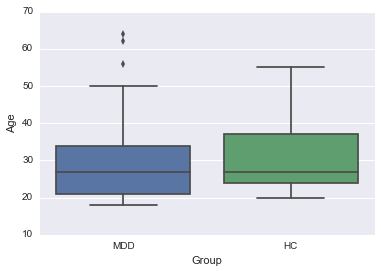

In [8]:
print (sr.groupby('Group')['Age'].describe())

print ('Between-group t-tests on Age')
misc.ttest_2s(sr[sr.Group == 'HC']['Age'],sr[sr.Group == 'MDD']['Age'])

sns.boxplot(y='Age', x='Group', data = sr)

Group       
HC     count    41.000000
       mean     16.743902
       std       2.239202
       min      12.000000
       25%      16.000000
       50%      16.000000
       75%      18.000000
       max      22.000000
MDD    count    37.000000
       mean     15.932432
       std       2.925373
       min      12.000000
       25%      14.000000
       50%      16.000000
       75%      17.000000
       max      25.000000
dtype: float64
Between-group t-tests on Education
t(76) = 1.38, p = 0.171, g = 0.314


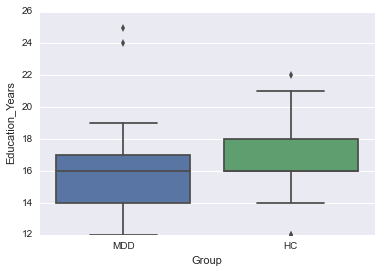

In [9]:
print (sr.groupby('Group')['Education_Years'].describe())

print ('Between-group t-tests on Education')
misc.ttest_2s(sr[sr.Group == 'HC']['Education_Years'],sr[sr.Group == 'MDD']['Education_Years'])

sns.boxplot(y='Education_Years', x='Group', data = sr)

### *BDI*

Group       
HC     count    41.000000
       mean      1.365854
       std       2.405786
       min       0.000000
       25%       0.000000
       50%       0.000000
       75%       2.000000
       max      12.000000
MDD    count    37.000000
       mean     28.243243
       std       8.162943
       min      16.000000
       25%      22.000000
       50%      28.000000
       75%      35.000000
       max      47.000000
dtype: float64
Between-group t-tests on BDI
t(76) = -20.15, p = 0.000, g = -4.569


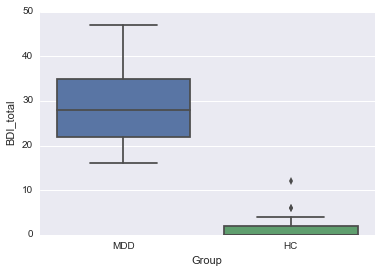

In [10]:
print (sr.groupby('Group')['BDI_total'].describe())

print ('Between-group t-tests on BDI')
misc.ttest_2s(sr[sr.Group == 'HC']['BDI_total'],sr[sr.Group == 'MDD']['BDI_total'])

sns.boxplot(y='BDI_total', x='Group', data = sr)

### *BIS-BAS*

Between-group t-tests on BIS
t(76) = -6.08, p = 0.000, g = -1.379
Between-group t-tests on BAS_D
t(76) = 3.21, p = 0.002, g = 0.728
Between-group t-tests on BAS_FS
t(76) = 3.62, p = 0.001, g = 0.821
Between-group t-tests on BAS_RR
t(76) = 1.56, p = 0.123, g = 0.354


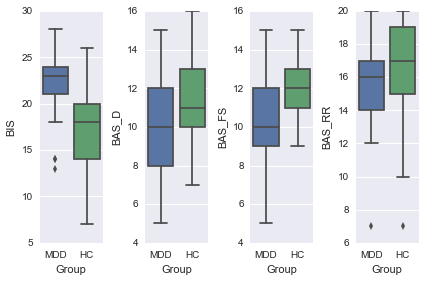

In [11]:
print ('Between-group t-tests on BIS')
misc.ttest_2s(sr[sr.Group == 'HC']['BIS'],sr[sr.Group == 'MDD']['BIS'])
print ('Between-group t-tests on BAS_D')
misc.ttest_2s(sr[sr.Group == 'HC']['BAS_D'],sr[sr.Group == 'MDD']['BAS_D'])
print ('Between-group t-tests on BAS_FS')
misc.ttest_2s(sr[sr.Group == 'HC']['BAS_FS'],sr[sr.Group == 'MDD']['BAS_FS'])
print ('Between-group t-tests on BAS_RR')
misc.ttest_2s(sr[sr.Group == 'HC']['BAS_RR'],sr[sr.Group == 'MDD']['BAS_RR'])


fig = plt.figure()
bis = fig.add_subplot(141)
sns.boxplot(y='BIS', x='Group', data = sr)
bis = fig.add_subplot(142)
sns.boxplot(y='BAS_D', x='Group', data = sr)
bas_fs = fig.add_subplot(143)
sns.boxplot(y='BAS_FS', x='Group', data = sr)
bas_rr = fig.add_subplot(144)
sns.boxplot(y='BAS_RR', x='Group', data = sr)
fig.tight_layout()

### *MASQ*

Between-group t-tests on MASQ_GDA
t(76) = -9.07, p = 0.000, g = -2.056
Between-group t-tests on MASQ_AA
t(76) = -5.22, p = 0.000, g = -1.184
Between-group t-tests on MASQ_GDD
t(76) = -15.90, p = 0.000, g = -3.604
Between-group t-tests on MASQ_AD
t(76) = -17.61, p = 0.000, g = -3.992


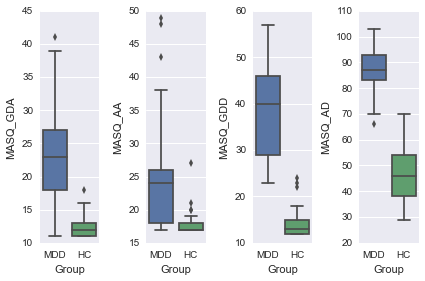

In [12]:
print ('Between-group t-tests on MASQ_GDA')
misc.ttest_2s(sr[sr.Group == 'HC']['MASQ_GDA'],sr[sr.Group == 'MDD']['MASQ_GDA'])
print ('Between-group t-tests on MASQ_AA')
misc.ttest_2s(sr[sr.Group == 'HC']['MASQ_AA'],sr[sr.Group == 'MDD']['MASQ_AA'])
print ('Between-group t-tests on MASQ_GDD')
misc.ttest_2s(sr[sr.Group == 'HC']['MASQ_GDD'],sr[sr.Group == 'MDD']['MASQ_GDD'])
print ('Between-group t-tests on MASQ_AD')
misc.ttest_2s(sr[sr.Group == 'HC']['MASQ_AD'],sr[sr.Group == 'MDD']['MASQ_AD'])

fig = plt.figure()
gda = fig.add_subplot(141)
sns.boxplot(y='MASQ_GDA', x='Group', data = sr)
aa = fig.add_subplot(142)
sns.boxplot(y='MASQ_AA', x='Group', data = sr)
gdd = fig.add_subplot(143)
sns.boxplot(y='MASQ_GDD', x='Group', data = sr)
ad = fig.add_subplot(144)
sns.boxplot(y='MASQ_AD', x='Group', data = sr)
fig.tight_layout()

### *AES*

Between-group t-tests on AES
t(76) = -15.99, p = 0.000, g = -3.626


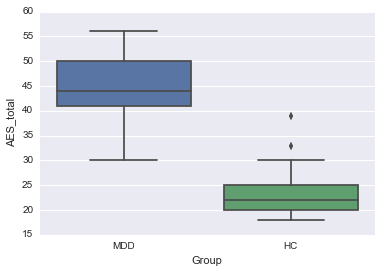

In [13]:
print ('Between-group t-tests on AES')
misc.ttest_2s(sr[sr.Group == 'HC']['AES_total'],sr[sr.Group == 'MDD']['AES_total'])

sns.boxplot(y='AES_total', x='Group', data = sr)

### *STAI*

Between-group t-tests on STAI trait
t(76) = -11.53, p = 0.000, g = -2.615
Between-group t-tests on STAI state
t(76) = -18.06, p = 0.000, g = -4.095


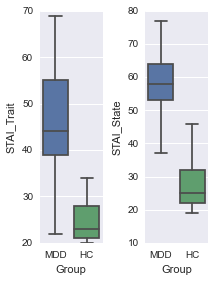

In [14]:
print ('Between-group t-tests on STAI trait')
misc.ttest_2s(sr[sr.Group == 'HC']['STAI_Trait'],sr[sr.Group == 'MDD']['STAI_Trait'])
print ('Between-group t-tests on STAI state')
misc.ttest_2s(sr[sr.Group == 'HC']['STAI_State'],sr[sr.Group == 'MDD']['STAI_State'])

fig = plt.figure()
trait = fig.add_subplot(141)
sns.boxplot(y='STAI_Trait', x='Group', data = sr)
state = fig.add_subplot(142)
sns.boxplot(y='STAI_State', x='Group', data = sr)
fig.tight_layout()

### *SHAPS*

Between-group t-tests on SHAPS
t(76) = -9.45, p = 0.000, g = -2.144


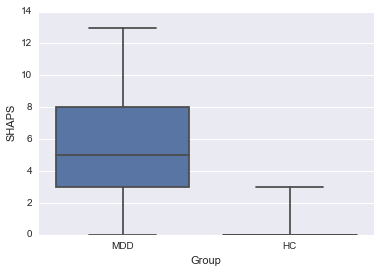

In [15]:
print ('Between-group t-tests on SHAPS')
misc.ttest_2s(sr[sr.Group == 'HC']['SHAPS'],sr[sr.Group == 'MDD']['SHAPS'])

sns.boxplot(y='SHAPS', x='Group', data = sr)

### *PSQI*

Between-group t-tests on PSQI duration
t(76) = -1.98, p = 0.051, g = -0.450
Between-group t-tests on PSQI Distubance
t(76) = -2.44, p = 0.017, g = -0.553
Between-group t-tests on PSQI Latency
t(76) = -2.82, p = 0.006, g = -0.643
Between-group t-tests on PSQI Daytime Disturbance
t(76) = -13.66, p = 0.000, g = -3.097
Between-group t-tests on PSQI Efficiency
t(76) = -2.22, p = 0.029, g = -0.504
Between-group t-tests on PSQI Quality
t(76) = -3.73, p = 0.000, g = -0.852
Between-group t-tests on PSQI Medication
t(76) = -0.84, p = 0.404, g = -0.190
Between-group t-tests on PSQI Total
t(76) = -6.54, p = 0.000, g = -1.503


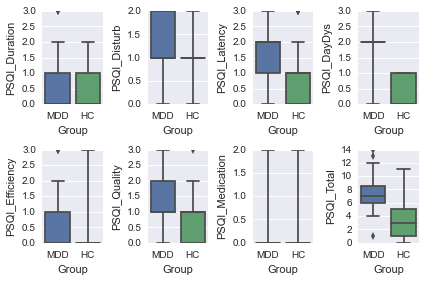

In [16]:
# Check on nan t-tests (prob have missing values)

print ('Between-group t-tests on PSQI duration')
misc.ttest_2s(sr[sr.Group == 'HC']['PSQI_Duration'],sr[sr.Group == 'MDD']['PSQI_Duration'])
print ('Between-group t-tests on PSQI Distubance')
misc.ttest_2s(sr[sr.Group == 'HC']['PSQI_Disturb'],sr[sr.Group == 'MDD']['PSQI_Disturb'])
print ('Between-group t-tests on PSQI Latency')
misc.ttest_2s(sr[sr.Group == 'HC']['PSQI_Latency'],sr[sr.Group == 'MDD']['PSQI_Latency'])
print ('Between-group t-tests on PSQI Daytime Disturbance')
misc.ttest_2s(sr[sr.Group == 'HC']['PSQI_DayDys'],sr[sr.Group == 'MDD']['PSQI_DayDys'])
print ('Between-group t-tests on PSQI Efficiency')
misc.ttest_2s(sr[sr.Group == 'HC']['PSQI_Efficiency'],sr[sr.Group == 'MDD']['PSQI_Efficiency'])
print ('Between-group t-tests on PSQI Quality')
misc.ttest_2s(sr[sr.Group == 'HC']['PSQI_Quality'],sr[sr.Group == 'MDD']['PSQI_Quality'])
print ('Between-group t-tests on PSQI Medication')
misc.ttest_2s(sr[sr.Group == 'HC']['PSQI_Medication'],sr[sr.Group == 'MDD']['PSQI_Medication'])
print ('Between-group t-tests on PSQI Total')
misc.ttest_2s(sr[sr.Group == 'HC']['PSQI_Total'],sr[sr.Group == 'MDD']['PSQI_Total'])
fig = plt.figure()
dur = fig.add_subplot(241)
sns.boxplot(y='PSQI_Duration', x='Group', data = sr)
dist = fig.add_subplot(242)
sns.boxplot(y='PSQI_Disturb', x='Group', data = sr)
lat = fig.add_subplot(243)
sns.boxplot(y='PSQI_Latency', x='Group', data = sr)
day = fig.add_subplot(244)
sns.boxplot(y='PSQI_DayDys', x='Group', data = sr)
eff = fig.add_subplot(245)
sns.boxplot(y='PSQI_Efficiency', x='Group', data = sr)
qual = fig.add_subplot(246)
sns.boxplot(y='PSQI_Quality', x='Group', data = sr)
med = fig.add_subplot(247)
sns.boxplot(y='PSQI_Medication', x='Group', data = sr)
tot = fig.add_subplot(248)
sns.boxplot(y='PSQI_Total', x='Group', data = sr) 
fig.tight_layout()

### *TCI*

In [17]:
sr.subject.nunique()

78

In [18]:
#RMD060 and RMD062 == invalid
sr.TCI_Valid.value_counts()

valid    78
dtype: int64

Between-group t-tests on Novelty Seeking
t(76) = -1.35, p = 0.181, g = -0.306
Between-group t-tests on Harm avoidance
t(76) = -9.92, p = 0.000, g = -2.251
Between-group t-tests on Reward dependence
t(76) = 2.74, p = 0.008, g = 0.620
Between-group t-tests on Persistence
t(76) = 8.03, p = 0.000, g = 1.822
Between-group t-tests on Self-Directedness 
t(76) = 11.19, p = 0.000, g = 2.536
Between-group t-tests on Cooperativeness
t(76) = 3.39, p = 0.001, g = 0.770
Between-group t-tests on Self Transcendence
t(76) = 1.17, p = 0.245, g = 0.266


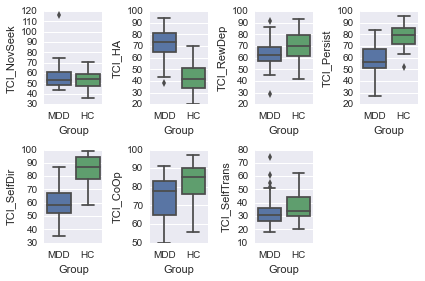

In [19]:
print ('Between-group t-tests on Novelty Seeking')
misc.ttest_2s(sr[sr.Group == 'HC']['TCI_NovSeek'],sr[sr.Group == 'MDD']['TCI_NovSeek'])
print ('Between-group t-tests on Harm avoidance')
misc.ttest_2s(sr[sr.Group == 'HC']['TCI_HA'],sr[sr.Group == 'MDD']['TCI_HA'])
print ('Between-group t-tests on Reward dependence')
misc.ttest_2s(sr[sr.Group == 'HC']['TCI_RewDep'],sr[sr.Group == 'MDD']['TCI_RewDep'])
print ('Between-group t-tests on Persistence')
misc.ttest_2s(sr[sr.Group == 'HC']['TCI_Persist'],sr[sr.Group == 'MDD']['TCI_Persist'])
print ('Between-group t-tests on Self-Directedness ')
misc.ttest_2s(sr[sr.Group == 'HC']['TCI_SelfDir'],sr[sr.Group == 'MDD']['TCI_SelfDir'])
print ('Between-group t-tests on Cooperativeness')
misc.ttest_2s(sr[sr.Group == 'HC']['TCI_CoOp'],sr[sr.Group == 'MDD']['TCI_CoOp'])
print ('Between-group t-tests on Self Transcendence')
misc.ttest_2s(sr[sr.Group == 'HC']['TCI_SelfTrans'],sr[sr.Group == 'MDD']['TCI_SelfTrans'])

fig = plt.figure()
nov = fig.add_subplot(241)
sns.boxplot(y='TCI_NovSeek', x='Group', data = sr)
ha = fig.add_subplot(242)
sns.boxplot(y='TCI_HA', x='Group', data = sr)
rewd = fig.add_subplot(243)
sns.boxplot(y='TCI_RewDep', x='Group', data = sr)
per = fig.add_subplot(244)
sns.boxplot(y='TCI_Persist', x='Group', data = sr)
self = fig.add_subplot(245)
sns.boxplot(y='TCI_SelfDir', x='Group', data = sr)
coop = fig.add_subplot(246)
sns.boxplot(y='TCI_CoOp', x='Group', data = sr)
med = fig.add_subplot(247)
sns.boxplot(y='TCI_SelfTrans', x='Group', data = sr) 
fig.tight_layout()

### *NEO*

Between-group t-tests on Neuroticism
t(76) = -16.35, p = 0.000, g = -3.708
Between-group t-tests on Exraversion
t(76) = 9.90, p = 0.000, g = 2.245
Between-group t-tests on Openness to Experience
t(76) = 0.71, p = 0.481, g = 0.161
Between-group t-tests on Agreeableness
t(76) = 2.88, p = 0.005, g = 0.653
Between-group t-tests on Conscientiousness
t(76) = 8.06, p = 0.000, g = 1.828


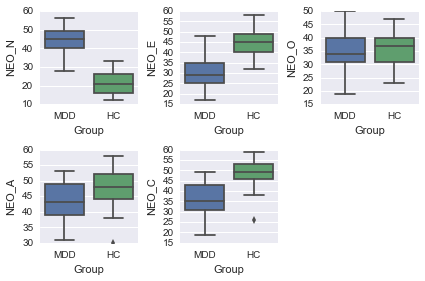

In [20]:
print ('Between-group t-tests on Neuroticism')
misc.ttest_2s(sr[sr.Group == 'HC']['NEO_N'],sr[sr.Group == 'MDD']['NEO_N'])
print ('Between-group t-tests on Exraversion')
misc.ttest_2s(sr[sr.Group == 'HC']['NEO_E'],sr[sr.Group == 'MDD']['NEO_E'])
print ('Between-group t-tests on Openness to Experience')
misc.ttest_2s(sr[sr.Group == 'HC']['NEO_O'],sr[sr.Group == 'MDD']['NEO_O'])
print ('Between-group t-tests on Agreeableness')
misc.ttest_2s(sr[sr.Group == 'HC']['NEO_A'],sr[sr.Group == 'MDD']['NEO_A'])
print ('Between-group t-tests on Conscientiousness')
misc.ttest_2s(sr[sr.Group == 'HC']['NEO_C'],sr[sr.Group == 'MDD']['NEO_C'])

fig = plt.figure()
neur = fig.add_subplot(231)
sns.boxplot(y='NEO_N', x='Group', data = sr)
ext = fig.add_subplot(232)
sns.boxplot(y='NEO_E', x='Group', data = sr)
ope = fig.add_subplot(233)
sns.boxplot(y='NEO_O', x='Group', data = sr)
agr = fig.add_subplot(234)
sns.boxplot(y='NEO_A', x='Group', data = sr)
con = fig.add_subplot(235)
sns.boxplot(y='NEO_C', x='Group', data = sr)
fig.tight_layout()

### *POMS*

Between-group t-tests on Tension-Anxiety
t(76) = -10.09, p = 0.000, g = -2.289
Between-group t-tests on Depression
t(76) = -15.79, p = 0.000, g = -3.580
Between-group t-tests on Anger-Hostility
t(76) = -6.29, p = 0.000, g = -1.427
Between-group t-tests on Vigor-Activity
t(76) = 12.68, p = 0.000, g = 2.876
Between-group t-tests on Fatigue
t(76) = -14.52, p = 0.000, g = -3.292
Between-group t-tests on Confusion-Bewilderment
t(76) = -3.77, p = 0.000, g = -0.855
Between-group t-tests on Total Mood Disturbance
t(76) = -16.39, p = 0.000, g = -3.716


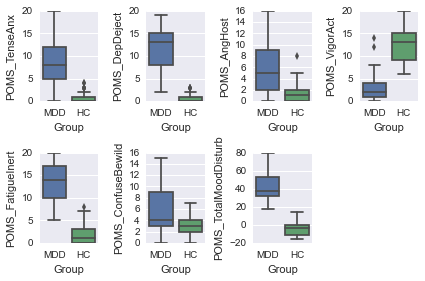

In [21]:
print ('Between-group t-tests on Tension-Anxiety')
misc.ttest_2s(sr[sr.Group == 'HC']['POMS_TenseAnx'],sr[sr.Group == 'MDD']['POMS_TenseAnx'])
print ('Between-group t-tests on Depression')
misc.ttest_2s(sr[sr.Group == 'HC']['POMS_DepDeject'],sr[sr.Group == 'MDD']['POMS_DepDeject'])
print ('Between-group t-tests on Anger-Hostility')
misc.ttest_2s(sr[sr.Group == 'HC']['POMS_AngHost'],sr[sr.Group == 'MDD']['POMS_AngHost'])
print ('Between-group t-tests on Vigor-Activity')
misc.ttest_2s(sr[sr.Group == 'HC']['POMS_VigorAct'],sr[sr.Group == 'MDD']['POMS_VigorAct'])
print ('Between-group t-tests on Fatigue')
misc.ttest_2s(sr[sr.Group == 'HC']['POMS_FatigueInert'],sr[sr.Group == 'MDD']
              ['POMS_FatigueInert'])
print ('Between-group t-tests on Confusion-Bewilderment')
misc.ttest_2s(sr[sr.Group == 'HC']['POMS_ConfuseBewild'],sr[sr.Group == 'MDD']
              ['POMS_ConfuseBewild'])
print ('Between-group t-tests on Total Mood Disturbance')
misc.ttest_2s(sr[sr.Group == 'HC']['POMS_TotalMoodDisturb'],sr[sr.Group == 'MDD']
              ['POMS_TotalMoodDisturb'])

fig = plt.figure()
tax = fig.add_subplot(241)
sns.boxplot(y='POMS_TenseAnx', x='Group', data = sr)
dep = fig.add_subplot(242)
sns.boxplot(y='POMS_DepDeject', x='Group', data = sr)
ah = fig.add_subplot(243)
sns.boxplot(y='POMS_AngHost', x='Group', data = sr)
va = fig.add_subplot(244)
sns.boxplot(y='POMS_VigorAct', x='Group', data = sr)
fat = fig.add_subplot(245)
sns.boxplot(y='POMS_FatigueInert', x='Group', data = sr)
cb = fig.add_subplot(246)
sns.boxplot(y='POMS_ConfuseBewild', x='Group', data = sr)
tot = fig.add_subplot(247)
sns.boxplot(y='POMS_TotalMoodDisturb', x='Group', data = sr)
fig.tight_layout()

### *WTAR*

Between-group t-tests on WTAR
t(76) = 0.14, p = 0.890, g = 0.031


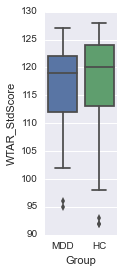

In [22]:
# Figure out why nan for t-test
print ('Between-group t-tests on WTAR')
misc.ttest_2s(sr[sr.Group == 'HC']['WTAR_StdScore'],sr[sr.Group == 'MDD']['WTAR_StdScore'])

fig = plt.figure()
trait = fig.add_subplot(141)
sns.boxplot(y='WTAR_StdScore', x='Group', data = sr)

# PST Train

In [23]:
# Assemble the PST training data

%cd {path2data}

train_dfs = []
train_d = re.compile('fMRI_train')

subjects = !ls -d RMD0*

for subject in subjects:
    file_list = [] # Some subjects have multiple training files, e.g. due to restart after scanner issue.
    curr_path = path2data + subject + "/"
    for root, dirs, files in os.walk(curr_path):
        for filename in files:
            train_m = train_d.search(filename)
            if train_m:
                file_path = curr_path + filename
                file_list.append(file_path)

    newest_train_file = file_list[-1:][0] # Select the newest training file as it's most likely to be correct.
#     print newest_train_file
    train_df = pd.read_csv(newest_train_file)
    train_df['subject'] = subject
    train_dfs.append(train_df)
                
train_data = pd.concat(train_dfs)
train_data['lnRT'] = train_data.trial_RT.apply(np.log)
train_columns = ['subject','group','trial_num','block','trial_RT','lnRT','accuracy',
                 'left_stim','left_stim_number','right_stim','right_stim_number',
                 'object_onset','object_duration','response','response_onset','isi_onset',
                 'isi_duration','scheduled_outcome','feedback','feedback_onset',
                 'feedback_duration','iti_onset','iti_duration']

/Users/ebarrick/Work/Expts/REWMEM/Version4/Data


In [24]:
train_data['group'].replace(0, 'HC',inplace=True)
train_data['group'].replace(1, 'MDD',inplace=True)

train_data = train_data.reindex(columns=train_columns)

In [25]:
#Merging the PST train data with the self report data
train_full = pd.merge(left=train_data, right=sr, left_on='subject',right_on='subject')

In [26]:
def OutCheck(in_df):
    """Function to look for outliers, judged based on lnRT."""
    dfs = []
    for sub in in_df.subject.unique():
        outlier = []
        df = in_df[in_df.subject == sub]
        for i, row_i in df.iterrows():
            if row_i.trial_RT < 0.01: # Added to catch trials with too fast RTs (< 100 ms)
                outlier.append(1)
            elif np.isnan(row_i.lnRT):
                outlier.append(np.nan)
            elif abs(row_i.lnRT-df.lnRT.mean()) <= df.lnRT.std()*3:
                outlier.append(0)
            else:
                outlier.append(1)
        df['outlier'] = outlier
        dfs.append(df)
    out = pd.concat(dfs)
    return out

train = OutCheck(train_full)

In [27]:
# Not too many outliers . . . 
print 'Number of trials that are outliers for each subject:'
df1 = train[train['outlier'] == 1]
print (df1.groupby('subject')['outlier'].count())

Number of trials that are outliers for each subject:
subject
RMD003     1
RMD004     3
RMD005     3
RMD007    17
RMD009     1
RMD010     2
RMD011     1
RMD012     1
RMD013     7
RMD014     3
RMD016     1
RMD017    16
RMD018     1
RMD019    21
RMD020     8
RMD021    12
RMD027     1
RMD028    11
RMD031     2
RMD034     1
RMD035     1
RMD036     3
RMD037     3
RMD038     2
RMD041     1
RMD042     2
RMD043     1
RMD044     9
RMD045     1
RMD046     2
RMD047     1
RMD048     2
RMD049     1
RMD050     6
RMD051     5
RMD053     1
RMD054     1
RMD055    12
RMD057     1
RMD059     1
RMD061     6
RMD063     1
RMD064    20
RMD065     1
RMD066     1
RMD067     1
RMD069    11
RMD070     3
RMD071     2
RMD078     2
RMD079     1
RMD081    20
RMD082    11
RMD084     4
RMD085     2
RMD086     2
RMD089     3
RMD090     3
RMD092    18
Name: outlier, dtype: int64


In [28]:
# Let's look at the number of no-response trials by subject . . . this only partially matches with the <90% below.
# RMD039 is not in that last, but RMD045 is and here he/she appears to have only 1 no-resp trial. Similar with RMD082,
# only 11 no-resp trials here but is on the list below. What explains the difference? 

# At least for RMD, the issue is that he/she completed more than the usual number of blocks, looks like the
# code had to be restarted. So let's tweak the initial generation of the train df so that it if more than one
# train CSV is available, it always uses the second one.

# Fixed, checking again . . . RMD045 and RMD082 are both still on list below, not here. Why?
# Checked the raw data: 

# RMD045 only completed 3 blocks and thus is missing 60 trials--with 1 no-resp and 179 trials
# with a response, that's 180 trials = 3 blocks x 60 trials per block. No explanation in Notes.

# RMD082 only completed 131 trials--got up to trial 11 of block 3, then stopped. Consistent with Notes, which 
# indicate that this subject was removed from scanner.

no_resp = train[train.trial_RT == 999]
no_resp['subject'].value_counts()

RMD039    77
RMD077    51
RMD068    50
RMD006    49
RMD015    39
RMD029    24
RMD091    22
RMD019    21
RMD081    20
RMD064    20
RMD092    18
RMD007    17
RMD017    16
RMD055    12
RMD021    12
RMD082    11
RMD028    11
RMD069    11
RMD044     9
RMD020     8
RMD013     7
RMD050     6
RMD061     6
RMD051     5
RMD090     3
RMD037     3
RMD070     3
RMD036     3
RMD084     3
RMD089     3
RMD005     3
RMD004     3
RMD010     2
RMD038     2
RMD046     2
RMD078     2
RMD042     2
RMD048     2
RMD071     2
RMD086     2
RMD085     2
RMD016     1
RMD018     1
RMD035     1
RMD034     1
RMD011     1
RMD049     1
RMD053     1
RMD079     1
RMD054     1
RMD009     1
RMD065     1
RMD057     1
RMD043     1
RMD041     1
RMD067     1
RMD003     1
RMD045     1
RMD066     1
dtype: int64

In [29]:
# Count number of trials with no response, drop them, and drop outliers.
print 'Number of trials with no response: ' + str(len(train[train.trial_RT == 999])) 
train_clean = train[~((train.trial_RT == 999) | (train.outlier == 1))]

Number of trials with no response: 582


In [30]:
def make_pair(data):
    '''take left and right stimulus output pair'''
    d = {1:'AB', 2:'CD',3:'EF',4:'EF',5:'CD',6:'AB'}
    pair = d[data]
    return pair

train_clean['pair'] = train_clean.left_stim_number.apply(make_pair)

In [31]:
# Looks right . . . 
train_clean[['left_stim_number','right_stim_number','pair']].head()

,left_stim_number,right_stim_number,pair
0,2,5,CD
1,3,4,EF
2,1,6,AB
3,1,6,AB
4,5,2,CD


In [32]:
# Find out which participants responded <90% of the time, and put them in a list so we can easily exclude them for 
# all the upcoming analyses. Don't exclude RMD045, though, as he/she has only 3 blocks but data are clean.

asleep = []
g = train_clean.groupby(['subject', 'group']).trial_num.count()
df = g.to_frame()
df.reset_index(inplace=True)

for i, row_i in df.iterrows():
    if row_i.trial_num < 216 and row_i.subject != 'RMD045':
        print row_i.subject, row_i.group, row_i.trial_num
        asleep.append(row_i.subject)

RMD006 HC 191
RMD015 HC 201
RMD039 HC 139
RMD068 MDD 190
RMD077 MDD 189
RMD082 MDD 120


In [33]:
asleep

['RMD006', 'RMD015', 'RMD039', 'RMD068', 'RMD077', 'RMD082']

I think it makes sense to drop these subjects, with the exception of RMD045 who completed 3 blocks with only 1 non-response. We can run the analyses with and without them and report the data both ways, but for now I will drop.

In [34]:
train_clean = train_clean[~(train_clean.subject.isin(asleep))]
train_clean.reset_index(inplace=True)

### Train Reaction Time

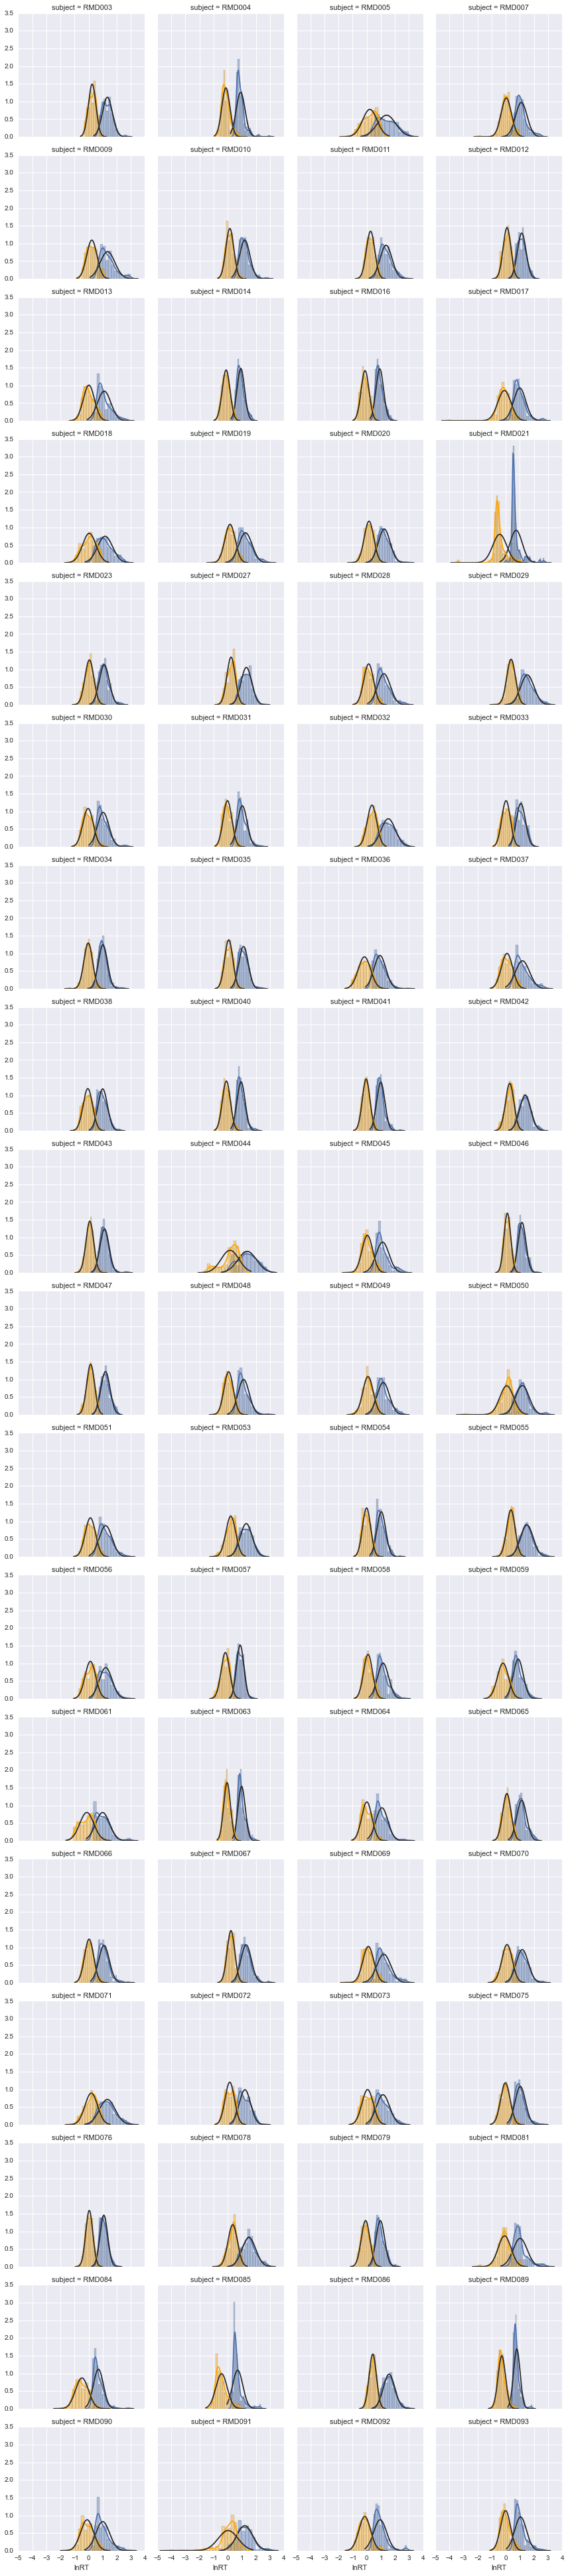

In [35]:
# Single subject data, raw and log transformed RT with normal distribution overlaid to detect deviations.
# lnRT is a definite improvement; note that some people have bimodal distributions (RMD048) and/or some very long
# RTs (RMD029)
g = sns.FacetGrid(data=train_clean,col='subject',col_wrap=4)
g.map(sns.distplot,'trial_RT',kde=True,fit=sp.stats.norm)
g.map(sns.distplot,'lnRT',kde=True,fit=sp.stats.norm,color='orange')

In [36]:
# Cleaning up a couple of variables, then pushing to R

train_clean.Education_Level = train_clean.Education_Level.astype(str)
train_clean.Occupation = train_clean.Occupation.astype(str)
train_clean['Highest Degree'] = train_clean['Highest Degree'].astype(str)
train_clean.Income = train_clean.Income.astype(str)
del train_clean['Notes']

%Rpush train_clean
# %R str(train_clean) # Always run this to take a look at what you have. Notice that 'block' is not a factor--fix.
%R train_clean$block <- as.factor(train_clean$block)

%R train_rt.aov <- aov_ez(id='subject', dv='lnRT', data=train_clean, between='group', within=c('pair','block'),\
                         anova_table=list(correction='none',es='pes'))
%R print(train_rt.aov) # Main effects of Group, Pair, and Block

/Users/ebarrick/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: Contrasts set to contr.sum for the following variables: group

  res = super(Function, self).__call__(*new_args, **new_kwargs)


            Effect     df  MSE         F  pes p.value
1            group  1, 69 0.38    4.02 *  .06     .05
2             pair 2, 138 0.04    3.19 *  .04     .04
3       group:pair 2, 138 0.04      0.58 .008     .56
4            block 3, 207 0.05 34.79 ***  .34  <.0001
5      group:block 3, 207 0.05      0.46 .007     .71
6       pair:block 6, 414 0.01      0.95  .01     .46
7 group:pair:block 6, 414 0.01      0.62 .009     .71


I know I suggested doing a block 4 - block 1 RT subtraction but it's unnecessary and just adds complexity, so I cut it.

/Users/ebarrick/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


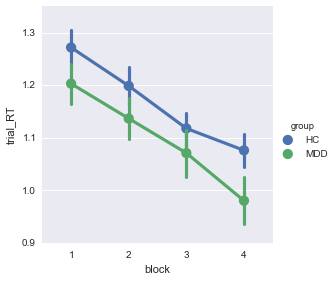

In [37]:
# Let's look at the RT over blocks. A few points here: (1) need to make sure you include "units = 'subject'" as that
# averages within subjects before plotting . . . if not done, you're taking all the hundreds or thousands of data
# points in each cell and averaging like you had 1 subject per group; (2) ci = 68 (adds standard error bars); (3) the
# default plot in factorplot is point plot, so I find it helpful to just call that and specify "kind = 'bar'"; and (4)
# the RT stats are run on lnRT b/c ANOVAs are designed for normally distributed data, but the plots and descriptives
# that go into a paper or talk use regular RT (trial_RT here) because that's more intuitive than ln.


# This shows both the Group and Block effects very clearly. Very surprising that the MDD's are faster!
# At least any HC > MDD effects will not be confounded by psychomotor slowing . . .

sns.set_style('darkgrid')
sns.factorplot(y='trial_RT', x='block', hue='group', hue_order=['HC','MDD'], units='subject', ci=68, data=train_clean)
sns.plt.savefig(path2figs + 'RMD_PST_Train_Group_x_Block_RT.pdf')

/Users/ebarrick/anaconda/lib/python2.7/site-packages/seaborn/categorical.py:3304: UserWarning: The `x_order` parameter has been renamed `order`
  UserWarning)


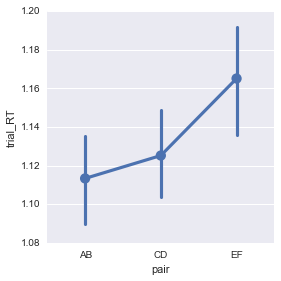

In [38]:
# Let's check out the Pair effect
sns.factorplot(y = 'trial_RT', x='pair', x_order=['AB','CD','EF'], units='subject', ci=68, data=train_clean)
sns.plt.savefig(path2figs + 'RMD_PST_Train_Pair_RT.pdf')

In [39]:
# Okay, now we need to do some follow-ups to unpack those significant effects. Since Group only has two levels,
# no futher tests are needed--we can just look at the descriptives. Let's do that . . . MDDs are faster.

df = misc.MakeFrame(in_df=train_clean,id_vars=['group','subject'],dv='trial_RT',agg_func='mean')
df.head()

print df.groupby('group')['trial_RT'].mean()
print df.groupby('group')['trial_RT'].std()

group
HC     1.16720
MDD    1.09871
Name: trial_RT, dtype: float64
group
HC     0.172528
MDD    0.208206
Name: trial_RT, dtype: float64


In [40]:
# For the Block effect it's not so simple . . . we know there is an effect, but we don't know which specific 
# comparisons are significant (could be just Block 1 vs Block 4, or maybe it's Block 1 vs. 2 vs. 3 vs. 4, etc).
# The R package 'lsmeans' provides follow-up tests that control for the number of tests run, and it also 
# adjusts for the other factors in the model.

%R block_RT.lsm <- lsmeans(train_rt.aov, ~ block)
%R print(block_RT.lsm) # Shows the least square means, looks right
%R print(pairs(block_RT.lsm)) # Shows that all pairwise comparisons are significant, notice the Tukey HSD correction

/Users/ebarrick/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: NOTE: Results are based on intra-block estimates.

  res = super(Function, self).__call__(*new_args, **new_kwargs)
/Users/ebarrick/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: NOTE: Results may be misleading due to involvement in interactions

  res = super(Function, self).__call__(*new_args, **new_kwargs)


 block       lsmean         SE     df    lower.CL     upper.CL
 X1     0.150692589 0.02469626 126.45  0.10182111  0.199564071
 X2     0.079063331 0.02469626 126.45  0.03019185  0.127934812
 X3     0.009696774 0.02469626 126.45 -0.03917471  0.058568256
 X4    -0.052825090 0.02474508 127.28 -0.10179010 -0.003860082

Results are averaged over the levels of: group, pair 
Confidence level used: 0.95 


 contrast   estimate         SE  df t.ratio p.value
 X1 - X2  0.07162926 0.02127897 209   3.366  0.0050
 X1 - X3  0.14099581 0.02127897 209   6.626  <.0001
 X1 - X4  0.20351768 0.02139211 209   9.514  <.0001
 X2 - X3  0.06936656 0.02127897 209   3.260  0.0071
 X2 - X4  0.13188842 0.02139211 209   6.165  <.0001
 X3 - X4  0.06252186 0.02139211 209   2.923  0.0200

Results are averaged over the levels of: group, pair 
P value adjustment: tukey method for comparing a family of 4 estimates 


In [41]:
# Same issue with the Pair effect: we know there's at least one significant effect in there, but we don't know which
# one (or more) it is . . .

%R pair_RT.lsm <- lsmeans(train_rt.aov, ~ pair)
%R print(pair_RT.lsm)
%R print(pairs(pair_RT.lsm)) # Only the most extreme difference--AB vs. EF--is significant (that's fine).

 pair     lsmean         SE     df     lower.CL   upper.CL
 AB   0.02847938 0.02314905 100.05 -0.017447386 0.07440615
 CD   0.04116649 0.02314905 100.05 -0.004760281 0.08709325
 EF   0.07032484 0.02314905 100.05  0.024398070 0.11625160

Results are averaged over the levels of: group, block 
Confidence level used: 0.95 


 contrast    estimate         SE  df t.ratio p.value
 AB - CD  -0.01268711 0.01697701 138  -0.747  0.7358
 AB - EF  -0.04184546 0.01697701 138  -2.465  0.0394
 CD - EF  -0.02915835 0.01697701 138  -1.718  0.2023

Results are averaged over the levels of: group, block 
P value adjustment: tukey method for comparing a family of 3 estimates 


### Train Accuracy

In [42]:
# Just changing a few things here and there b/c they are conventions . . . in R, fitted models are often given
# extensions that reflect the type (*aov, *lsm) or number (fm.1, fm.2) of procedure. In seaborn (and in regressions),
# variable 'y' is typically listed before variable 'x' because you're fitting the model to y . . . not a big deal but
# might as well get in the habit as others will expect it.

%R train_acc.aov <- aov_ez(id='subject', dv='accuracy', data=train_clean, between='group',\
                            within=c('pair','block'))

%R print (train_acc.aov) # Strong effects of Pair and Block

            Effect           df  MSE         F  ges p.value
1            group        1, 69 0.15      1.18 .005     .28
2             pair 1.63, 112.26 0.08 25.78 ***  .09  <.0001
3       group:pair 1.63, 112.26 0.08      0.85 .003     .41
4            block 2.66, 183.47 0.04  8.84 ***  .02  <.0001
5      group:block 2.66, 183.47 0.04      0.89 .002     .44
6       pair:block 5.20, 359.00 0.03      1.20 .005     .31
7 group:pair:block 5.20, 359.00 0.03      1.10 .004     .36


In [43]:
# This isn't correct--I think you know this since we talked about it a bit last time, but just to review . . . you 
# can tell it's not right because the df is far too numerous at >17,000 [t(17988)]. For a b/w groups t-test, the df =
# n1 + n2 - 2. So for us that's 34 + 38 = 72 - 2 = 70. It's much too big here because the data in train_clean are
# not averaged within subjects first, so the test you ran takes every line of the file as though it was a separate
# subject, assigned to either HC or MDD based on 'group'. Another way to tell you're not on the right track here is
# to look at the main effect of Group in the ANOVA table above . . . it's not significant, at p = 0.28, whereas this
# is quite significant at p < 0.001.

print 100*(train_clean.groupby(['group','pair'])['accuracy'].mean())

print ('Between-group t-tests on accuracy')
misc.ttest_2s(train_clean[train_clean.group == 'HC']['accuracy'],
              train_clean[train_clean.group == 'MDD']['accuracy'])

group  pair
HC     AB      78.991597
       CD      69.431438
       EF      60.309452
MDD    AB      72.682743
       CD      67.031722
       EF      59.722222
Name: accuracy, dtype: float64
Between-group t-tests on accuracy
t(16902) = 4.33, p = 0.000, g = 0.067


(4.3322072930239512, 1.4847323642451638e-05, 0.066751902021714563)

In [44]:
# Here's the same t-test after averaging within subjects--df = 70, n.s. (but this isn't a test we should run anyway
# because it's equivalent the main effect of Group in the ANOVA, which is n.s.)

df = misc.MakeFrame(in_df=train_clean,id_vars=['group','subject'],dv='accuracy',agg_func='mean')
df.head()
misc.ttest_2s(df[df.group == 'HC']['accuracy'],df[df.group == 'MDD']['accuracy'], paired=False)

t(70) = 1.25, p = 0.215, g = 0.295


(1.2516338279972195, 0.21486980448087198, 0.295469245878408)

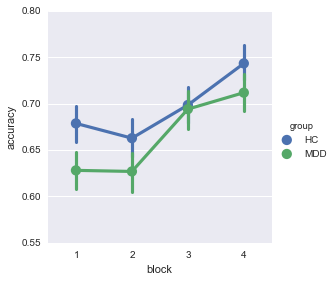

In [45]:
# Accuracy over blocks . . . here's what we had before--note the size of the error bars
sns.factorplot(y="accuracy", x="block", hue="group", hue_order=['HC','MDD'], data=train_clean)

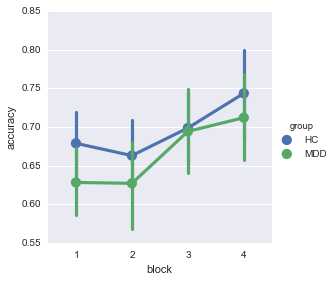

In [46]:
# Accuracy over blocks again, this time with units=subject. Notice the bars get bigger . . . that's because
# averaging over ~35 data points gives you a much noisier estimate than averaging over thousands of data points.
# Notice also that I have ci=95 here. ci='confidence interval', and ci=95 is the default . . . if I omitted it, 
# we'd get the same plot.
sns.factorplot(y="accuracy", x="block", hue="group", hue_order=['HC','MDD'], units='subject', ci=95, data=train_clean)

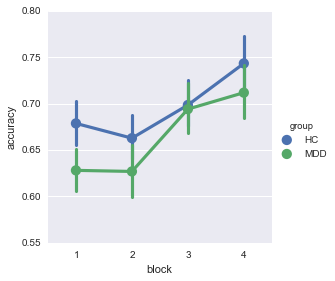

In [47]:
# Now here's accuracy over blocks once more, but with ci=68. This corresponds to the standard error of the mean,
# it's the conventional setting, and you can see it shrinks the bars a bit. This is the plot we want.
sns.factorplot(y="accuracy", x="block", hue="group", hue_order=['HC','MDD'], units='subject', ci=68, data=train_clean)
sns.plt.savefig(path2figs + 'RMD_PST_Train_Group_x_Block_Acc.pdf')

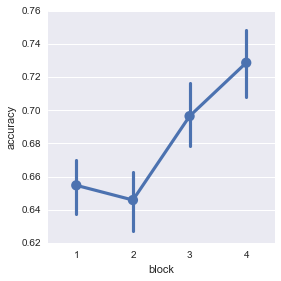

In [48]:
# One more plot of the Block effect, this time averaged over Group since Group didn't make a difference . . . 
# . . . looks like people experimented in block 2 and then stuck with what they learned.

sns.factorplot(y="accuracy", x="block", units='subject', ci=68, data=train_clean)
sns.plt.savefig(path2figs + 'RMD_PST_Train_Block_ACC.pdf')

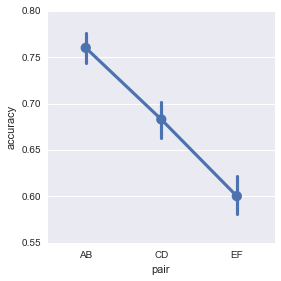

In [49]:
# Now let's look at the Pair effect . . . well that's a pretty clear result!

sns.factorplot(y="accuracy", x="pair", order=['AB','CD', 'EF'], units='subject', ci=68, data=train_clean)
sns.plt.savefig(path2figs + 'RMD_PST_Train_Pair_ACC.pdf')

Once again I cut the block 4 - block 1 subtractions as unncessary . . . sorry for making you do extra work!

In [50]:
# Okay, now use lsmeans to decompose the Block effect.

%R block_acc.lsm <- lsmeans(train_acc.aov, ~ block)
%R print(block_acc.lsm) # Looks right . . . again, these means are adjusted for the other factors (pair, etc) in model
%R print(pairs(block_acc.lsm)) # Diffs are 1 vs. 4, 2 vs. 3, and 2 vs. 4. Might look like there should be more . . . 
%R print(pairs(block_acc.lsm, adjust='none')) # . . . if you turn Tukey off, there are (but prob not a good idea).

 block    lsmean         SE     df  lower.CL  upper.CL
 X1    0.6545569 0.01734836 181.20 0.6203261 0.6887876
 X2    0.6458151 0.01734836 181.20 0.6115843 0.6800458
 X3    0.6969402 0.01734836 181.20 0.6627094 0.7311710
 X4    0.7268792 0.01740195 182.59 0.6925445 0.7612140

Results are averaged over the levels of: group, pair 
Confidence level used: 0.95 


 contrast     estimate         SE  df t.ratio p.value
 X1 - X2   0.008741808 0.01869108 209   0.468  0.9660
 X1 - X3  -0.042383344 0.01869108 209  -2.268  0.1090
 X1 - X4  -0.072322368 0.01879046 209  -3.849  0.0009
 X2 - X3  -0.051125152 0.01869108 209  -2.735  0.0339
 X2 - X4  -0.081064176 0.01879046 209  -4.314  0.0001
 X3 - X4  -0.029939024 0.01879046 209  -1.593  0.3847

Results are averaged over the levels of: group, pair 
P value adjustment: tukey method for comparing a family of 4 estimates 


 contrast     estimate         SE  df t.ratio p.value
 X1 - X2   0.008741808 0.01869108 209   0.468  0.6405
 X1 - X3  -0.042383344 0.01869108 209  -2.268  0.0244
 X1 - X4  -0.072322368 0.01879046 209  -3.849  0.0002
 X2 - X3  -0.051125152 0.01869108 209  -2.735  0.0068
 X2 - X4  -0.081064176 0.01879046 209  -4.314  <.0001
 X3 - X4  -0.029939024 0.01879046 209  -1.593  0.1126

Results are averaged over the levels of: group, pair 


In [51]:
# And now the Pair effect . . . every pair is different from every other pair. Good . . . 

%R pair_acc.lsm <- lsmeans(train_acc.aov, ~ pair)
%R print(pair_acc.lsm) # Looks right 
%R print(pairs(pair_acc.lsm))

 pair    lsmean         SE     df  lower.CL  upper.CL
 AB   0.7592197 0.01823581 181.41 0.7232381 0.7952013
 CD   0.6833598 0.01823581 181.41 0.6473782 0.7193413
 EF   0.6005640 0.01823581 181.41 0.5645825 0.6365456

Results are averaged over the levels of: group, block 
Confidence level used: 0.95 


 contrast   estimate         SE  df t.ratio p.value
 AB - CD  0.07585993 0.02210116 138   3.432  0.0023
 AB - EF  0.15865568 0.02210116 138   7.179  <.0001
 CD - EF  0.08279574 0.02210116 138   3.746  0.0008

Results are averaged over the levels of: group, block 
P value adjustment: tukey method for comparing a family of 3 estimates 


In [52]:
# Let's take a look at how often people selected the various stimuli, so we can test out my 'AvoidB accuracy depends
# on how often you chose B during training' hypothesis . . . 

def CodeChoice(data):
    '''Use position of stimuli on screen and response to code choice.'''
    s = {1:'A', 2:'C', 3:'E', 4:'F', 5:'D', 6:'B'}
    
    left_stim, right_stim, response = data
    
    if pd.isnull(response):
        choice = np.nan
    elif response == 'left':
        choice = s[left_stim]
    elif response == 'right':
        choice = s[right_stim]
    
    return choice

train_clean['choice'] = train_clean[['left_stim_number','right_stim_number','response']].apply(CodeChoice,axis=1)
train_clean[['left_stim_number','right_stim_number','response','choice']].head()

,left_stim_number,right_stim_number,response,choice
0,2,5,right,D
1,3,4,right,F
2,1,6,left,A
3,1,6,right,B
4,5,2,left,D


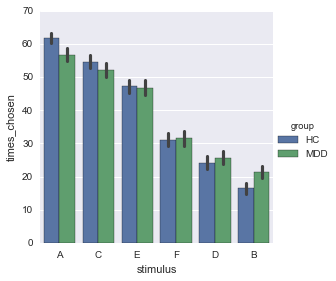

In [53]:
# Interesting pattern in the data below . . . HC > MDD for all the "good" stimuli, MDD > HC for all the "bad" stimuli.
# This is a remarkably clear graph, one of the best I've seen (ever, and certainly for the PST) . . . 

g = train_clean.groupby(['group','subject'])['choice'].value_counts()
df = g.to_frame()
df.reset_index(inplace=True)
new_cols = ['group','subject','stimulus','times_chosen']
df.columns = new_cols
# print df.head(13)
sns.factorplot(y='times_chosen',x='stimulus',x_order=['A','C','E','F','D','B'], hue='group',units='subject',
               kind='bar',ci=68,data=df)
sns.plt.savefig(path2figs + 'RMD_PST_Train_Choices.pdf')

In [54]:
# I'll run a 2 Group x 2 Stimulus (A,B) ANOVA on choice . . . I am cherry picking here by selecting the most extreme
# stimuli. But lo and behold, the interaction is (nearly) significant! (p = 0.05 != p < 0.05)

choose_ab = df[(df.stimulus == 'A') | (df.stimulus == 'B')]

%Rpush choose_ab
%R choose_ab.aov <- aov_ez(id='subject', dv='times_chosen', within='stimulus', between='group', data=choose_ab)
%R print(choose_ab.aov)

          Effect    df    MSE          F    ges p.value
1          group 1, 70   4.98       0.10 <.0001     .76
2       stimulus 1, 70 227.37 257.67 ***    .78  <.0001
3 group:stimulus 1, 70 227.37     3.93 +    .05     .05


In [55]:
# Run the follow-up tests . . . 
%R choose_ab.lsm <- lsmeans(choose_ab.aov, ~ stimulus * group)
%R print(choose_ab.lsm) # Looks right

# Okay to turn correction off here b/c only care about HC vs. MDD for A and B, and if
# the correction is not turned off we will adjust for 4 more tests we don't care about . . .
%R print(pairs(choose_ab.lsm,adjust='none')) # HC > MDD for choosing A, p = 0.048, HC < MDD for choosing B, p = 0.059.

 stimulus group   lsmean       SE    df lower.CL upper.CL
 A        HC    61.84531 1.749568 73.24 58.35862 65.33200
 B        HC    16.45057 1.749568 73.24 12.96388 19.93726
 A        MDD   56.73850 1.847417 72.90 53.05652 60.42048
 B        MDD   21.32673 1.847417 72.90 17.64475 25.00871

Confidence level used: 0.95 


 contrast        estimate       SE    df t.ratio p.value
 A,HC - B,HC    45.394737 3.459286 70.00  13.123  <.0001
 A,HC - A,MDD    5.106811 2.544435 73.07   2.007  0.0484
 A,HC - B,MDD   40.518576 2.544435 73.07  15.924  <.0001
 B,HC - A,MDD  -40.287926 2.544435 73.07 -15.834  <.0001
 B,HC - B,MDD   -4.876161 2.544435 73.07  -1.916  0.0592
 A,MDD - B,MDD  35.411765 3.657117 70.00   9.683  <.0001



group
HC     78.994492
MDD    72.572601
Name: accuracy, dtype: float64
group
HC     12.582822
MDD    14.421609
Name: accuracy, dtype: float64
t(70) = 2.02, p = 0.047, g = 0.476


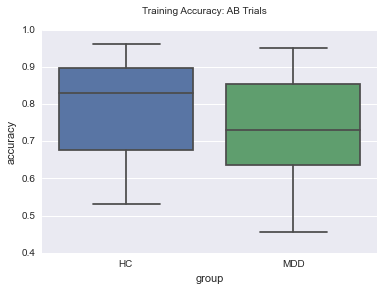

In [56]:
# If the above analysis is correct then it implies there should be a group difference in AB accuracy . . . 
# . . . and there is, despite the lack of a Group x Pair interaction. Nice!

train_ab = train_clean[train_clean.pair == 'AB']
df = misc.MakeFrame(in_df=train_ab,id_vars=['group','subject'],dv='accuracy',agg_func='mean')
df.head()

print 100*(df.groupby('group')['accuracy'].mean())
print 100*(df.groupby('group')['accuracy'].std())

misc.ttest_2s(df[df.group == 'HC']['accuracy'],df[df.group == 'MDD']['accuracy'],paired=False)

sns.boxplot(y='accuracy',x='group',data=df)
sns.plt.suptitle('Training Accuracy: AB Trials')
sns.plt.savefig(path2figs + 'RMD_PST_Train_AB_ACC.pdf')

I think the findings above look great--the basic patterns are there and the group difference on AB trials is very nice to see!

## PST Ratings

In [57]:
%cd {path2data}

rate_dfs = []
# rate_d = re.compile('fMRI_ratings')
rate_d = re.compile('_PST_fMRI_ratings') # Need to be careful here; line above grabs RevMem ratings too 

subjects = !ls -d RMD0*

for sub in subjects:
    
    # Copying in Python is tricky and best avoided--here's a cleaner way to get Group status
    group = train_full[train_full.subject == sub]['group'].unique()
    if group: # Some subjects (RMD001, RMD002) don't have a group so need to check for that before . . . 
        group = group[0] # . . . pulling the group name out of the list.
    else:
        group = 'none'
        
    curr_path = path2data + sub + "/"
    for root, dirs, files in os.walk(curr_path):
        for filename in files:
            rate_m = rate_d.search(filename)
            if rate_m:
                file_path = curr_path + filename
                rate_df = pd.read_csv(file_path)
                rate_df['group'] = group
                rate_df['subject'] = sub
                rate_dfs.append(rate_df)
                
PST_rate = pd.concat(rate_dfs)
ratings_columns = ['subject','group','stimulus','prompt','rating']
PST_rate = PST_rate.reindex(columns=ratings_columns)
PST_rate = PST_rate[~(PST_rate.group == 'none')] # Drop the pilots
PST_rate = PST_rate[~(PST_rate.subject.isin(asleep))] # Drop the sleepy peeps

/Users/ebarrick/Work/Expts/REWMEM/Version4/Data


In [58]:
PST_rate.head()

,subject,group,stimulus,prompt,rating
0,RMD003,MDD,reward,valence,9
1,RMD003,MDD,zero,valence,1
2,RMD003,MDD,reward,arousal,8
3,RMD003,MDD,zero,arousal,2
0,RMD004,HC,reward,valence,9


In [59]:
# We've got one less subject in the ratings than in the training. Who is it? RMD045--makes sense, quit early (quitter)
print train_clean.subject.nunique()
print PST_rate.subject.nunique()

for sub in train_clean.subject.unique():
    if sub not in PST_rate.subject.unique():
        print sub

72
71
RMD045


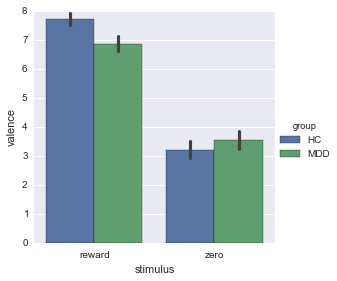

In [60]:
sns.factorplot(y='rating',x='stimulus',hue='group',hue_order=['HC','MDD'], units='subject',ci=68,kind='bar',
               data=PST_rate[PST_rate.prompt == 'valence'])
sns.plt.ylabel('valence')
sns.plt.savefig(path2figs + 'PST_Valence.pdf')

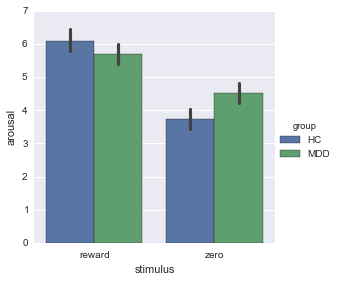

In [61]:
sns.factorplot(y='rating',x='stimulus',hue='group',hue_order=['HC','MDD'], units='subject',ci=68,kind='bar',
               data=PST_rate[PST_rate.prompt == 'arousal'])
sns.plt.ylabel('arousal')
sns.plt.savefig(path2figs + 'PST_Arousal.pdf')

In [62]:
# Totally fine to select out valence and then push just that to R, but here's another way . . . 

%Rpush PST_rate
%R valence = subset(PST_rate, prompt == 'valence')
%R arousal = subset(PST_rate, prompt == 'arousal')

print 'valence . . .'
%R valence.aov <- aov_ez(id='subject', dv='rating', data=valence, between='group', within=c('stimulus'))
%R print(valence.aov) # Only a main effect of Stim, but pretty clear we're headed to a Group x Stim (would be good)

print '\narousal . . .'
%R arousal.aov <- aov_ez(id='subject', dv='rating', data=arousal, between='group', within=c('stimulus'))
%R print(arousal.aov) # Main effect of Stim plus a Group x Stim interaction, excellent.

valence . . .


          Effect    df  MSE          F  ges p.value
1          group 1, 69 1.44       1.70 .006     .20
2       stimulus 1, 69 4.31 124.82 ***  .58  <.0001
3 group:stimulus 1, 69 4.31     2.94 +  .03     .09



arousal . . .


          Effect    df  MSE         F  ges p.value
1          group 1, 69 4.19      0.29 .002     .59
2       stimulus 1, 69 3.09 36.08 ***  .18  <.0001
3 group:stimulus 1, 69 3.09    4.03 *  .02     .05


In [63]:
# Follow-ups on valence (not strictly legal, but with p = 0.09 the GxS is a trend, and I'm running it for arousal so
# seems odd not to run for valence . . . plus I'm confident the GxS will be significant with a few more subjects)

# Nice, group difference in valence for rewards, not zeros!

%R valence.lsm <- lsmeans(valence.aov, ~ group*stimulus)
%R print(valence.lsm)
%R print(pairs(valence.lsm),adjust='none')

 group stimulus   lsmean        SE     df lower.CL upper.CL
 HC    reward   7.719806 0.2774981 112.85 7.170025 8.269588
 MDD   reward   6.857765 0.2925632 108.17 6.277865 7.437665
 HC    zero     3.219806 0.2774981 112.85 2.670025 3.769588
 MDD   zero     3.554735 0.2925632 108.17 2.974834 4.134635

Confidence level used: 0.95 


 contrast                 estimate        SE     df t.ratio p.value
 HC,reward - MDD,reward  0.8620415 0.4033602 110.48   2.137  0.0348
 HC,reward - HC,zero     4.5000000 0.4761552  69.00   9.451  <.0001
 HC,reward - MDD,zero    4.1650718 0.4033602 110.48  10.326  <.0001
 MDD,reward - HC,zero    3.6379585 0.4033602 110.48   9.019  <.0001
 MDD,reward - MDD,zero   3.3030303 0.5109558  69.00   6.464  <.0001
 HC,zero - MDD,zero     -0.3349282 0.4033602 110.48  -0.830  0.4081



In [64]:
# Follow-ups on arousal. Bizzare-o, the interaction is significant but neither follow-up is . . . but the 
# HC < MDD for zeros is a trend at p = 0.09.

%R arousal.lsm <- lsmeans(arousal.aov, ~ group*stimulus)
%R print(arousal.lsm)
%R print(pairs(arousal.lsm),adjust='none')

 group stimulus   lsmean        SE     df lower.CL upper.CL
 HC    reward   6.098749 0.3158969 133.37 5.473933 6.723565
 MDD   reward   5.690455 0.3254865 136.12 5.046791 6.334120
 HC    zero     3.730328 0.3158969 133.37 3.105512 4.355144
 MDD   zero     4.508637 0.3254865 136.12 3.864973 5.152301

Confidence level used: 0.95 


 contrast                 estimate        SE     df t.ratio p.value
 HC,reward - MDD,reward  0.4082935 0.4539016 134.88   0.900  0.3700
 HC,reward - HC,zero     2.3684211 0.4029597  69.00   5.878  <.0001
 HC,reward - MDD,zero    1.5901116 0.4539016 134.88   3.503  0.0006
 MDD,reward - HC,zero    1.9601276 0.4539016 134.88   4.318  <.0001
 MDD,reward - MDD,zero   1.1818182 0.4324107  69.00   2.733  0.0080
 HC,zero - MDD,zero     -0.7783094 0.4539016 134.88  -1.715  0.0887



Overall, the ratings data also look good--especially the group difference in valence ratings for rewards. This is a spot where the stats should definitely benefit from the addition of more subjects (that's true everywhere but the trending Group x Stimulus interaction for valence should--fingers crossed--by significant with more people). 

In [65]:
# Let's see if there's any relationship between AB accuracy during training and reward-zero difference scores for
# valence and/or arousal . . . create those difference scores in the next two cells . . . 

df = misc.MakeFrame(in_df=train_ab,id_vars=['group','subject'],dv='accuracy',agg_func='mean')
df.head()

,group,subject,accuracy
0,HC,RMD004,0.935897
1,HC,RMD005,0.531646
2,HC,RMD007,0.739726
3,HC,RMD009,0.925000
4,HC,RMD010,0.787500


In [66]:
valence = PST_rate[PST_rate.prompt == 'valence']
valence = valence.pivot(index='subject',columns='stimulus',values='rating')
valence.reset_index(inplace=True)
valence['valence_Rew_vs_Zero'] = valence['reward'] - valence['zero']
valence.head()

stimulus,subject,reward,zero,valence_Rew_vs_Zero
0,RMD003,9,1,8
1,RMD004,9,1,8
2,RMD005,9,1,8
3,RMD007,6,5,1
4,RMD009,3,7,-4


In [67]:
arousal = PST_rate[PST_rate.prompt == 'arousal']
arousal = arousal.pivot(index='subject',columns='stimulus',values='rating')
arousal.reset_index(inplace=True)
arousal['arousal_Rew_vs_Zero'] = arousal['reward'] - arousal['zero']
arousal.head()

stimulus,subject,reward,zero,arousal_Rew_vs_Zero
0,RMD003,8,2,6
1,RMD004,7,4,3
2,RMD005,2,2,0
3,RMD007,4,3,1
4,RMD009,6,5,1


In [68]:
# Now merge everything for the correlations . . . 
train_rate = pd.merge(valence,arousal,on='subject')
train_rate = train_rate[['subject','valence_Rew_vs_Zero','arousal_Rew_vs_Zero']]

train_corr = pd.merge(df,train_rate,on='subject')
train_corr.head()

,group,subject,accuracy,valence_Rew_vs_Zero,arousal_Rew_vs_Zero
0,HC,RMD004,0.935897,8,3
1,HC,RMD005,0.531646,8,0
2,HC,RMD007,0.739726,1,1
3,HC,RMD009,0.925000,-4,1
4,HC,RMD010,0.787500,6,3


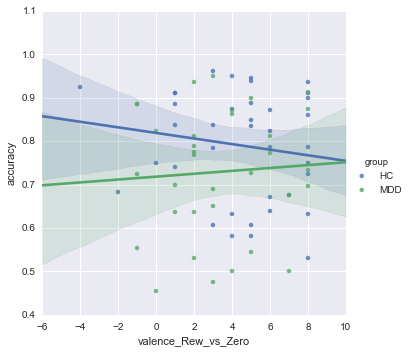

In [69]:
# No relationship . . . 
sns.lmplot(y='accuracy',x='valence_Rew_vs_Zero',hue='group', data=train_corr)

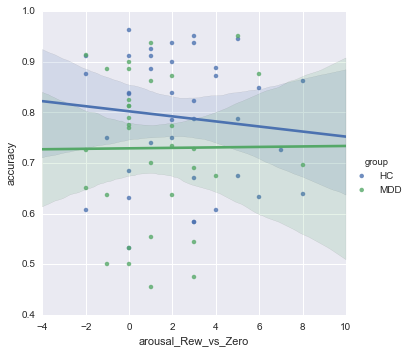

In [70]:
# No relationship . . . 
sns.lmplot(y='accuracy',x='arousal_Rew_vs_Zero',hue='group',data=train_corr)

# PST Test

In [97]:
'''Assemble the PST test data'''

%cd {path2data}

test_dfs = []
test_d = re.compile('PST_test')

subjects = !ls -d RMD0*

for sub in subjects:
    curr_path = path2data + sub + "/"
    for root, dirs, files in os.walk(curr_path):
        for filename in files:
            test_m = test_d.search(filename)
            if test_m:
                file_path = curr_path + filename
#                 print file_path
                test_df = pd.read_csv(file_path)
                test_df['subject'] = sub
                test_dfs.append(test_df)
                
test_data = pd.concat(test_dfs)
test_data['lnRT'] = test_data.trial_RT.apply(np.log)
test_columns = ['subject','group','block_id','trial_id','trial_RT','lnRT','trial_accuracy',
                'left_stim_name','left_stim_number','right_stim_name','right_stim_number',
                'response']

/Users/ebarrick/Work/Expts/REWMEM/Version4/Data


In [98]:
test_data['group'].replace(0, 'HC',inplace=True)
test_data['group'].replace(1, 'MDD',inplace=True)

test_data = test_data.reindex(columns=test_columns)

In [99]:
#Merging the PST test data with the self report data
test_full = pd.merge(left=test_data, right=sr, left_on='subject',right_on='subject')

In [100]:
# Looking for outliers . . . not bad at all . . . 

test = OutCheck(test_full)

print 'Number of trials that are outliers for each subject:'
df2 = test[test['outlier'] == 1]
print df2.groupby('subject')['outlier'].count()

Number of trials that are outliers for each subject:
subject
RMD005    1
RMD006    1
RMD009    1
RMD011    1
RMD012    2
RMD013    1
RMD014    4
RMD017    2
RMD018    2
RMD019    2
RMD020    1
RMD021    1
RMD023    1
RMD028    6
RMD029    5
RMD032    1
RMD033    1
RMD034    1
RMD035    1
RMD036    2
RMD037    1
RMD040    1
RMD041    1
RMD042    1
RMD045    1
RMD047    1
RMD048    1
RMD050    1
RMD051    1
RMD053    1
RMD054    1
RMD055    1
RMD056    1
RMD057    1
RMD058    1
RMD061    2
RMD064    1
RMD065    1
RMD067    1
RMD068    1
RMD075    1
RMD076    1
RMD077    1
RMD078    2
RMD079    1
RMD081    2
RMD084    1
RMD085    1
RMD086    1
RMD089    1
RMD091    1
RMD092    1
RMD093    1
Name: outlier, dtype: int64


In [101]:
# Count number of trials with no response, drop them, and drop outliers.
print 'Number of trials with no response: ' + str(len(test[test.trial_RT == 999])) 
test_clean = test[~((test.trial_RT == 999) | (test.outlier == 1))]

Number of trials with no response: 44


In [102]:
# Clean up the same variables that give R fits . . . 
test_clean.Education_Level = test_clean.Education_Level.astype(str)
test_clean.Occupation = test_clean.Occupation.astype(str)
test_clean['Highest Degree'] = test_clean['Highest Degree'].astype(str)
test_clean.Income = test_clean.Income.astype(str)
del test_clean['Notes']

In [103]:
#Make a pair column
def make_test_pair(data):
    '''take left and right stimulus, and output pair'''
    left_stim, right_stim = data
    d = {1:'A',2:'C',3:'E',4:'F',5:'D',6:'B'}
    left_char = d[left_stim]
    right_char = d[right_stim]
    pair = left_char + right_char
    return pair

test_clean['pair'] = test_clean[['left_stim_number','right_stim_number']].apply(make_test_pair, axis=1)

In [104]:
test_clean[['left_stim_number','right_stim_number','pair']].head()

,left_stim_number,right_stim_number,pair
0,1,2,AC
1,5,4,DF
2,3,6,EB
3,3,5,ED
4,6,5,BD


In [105]:
# Better to refer to Choose A and Avoid B as trial types rather than choices b/c the subject can make the wrong choice
# on either trial type . . .

def code_trial_type(data):
    '''catgorize choice pairs'''
    
    d = {'AC':'ChooseA', 'CA':'ChooseA', 'AD':'ChooseA', 'DA':'ChooseA','AE':'ChooseA','EA':'ChooseA','AF':'ChooseA',
         'FA':'ChooseA',
         
         'BC':'AvoidB','CB':'AvoidB','BD':'AvoidB','DB':'AvoidB','EB':'AvoidB','BE':'AvoidB','BF':'AvoidB','FB':'AvoidB',
          
         'AB':'neither','BA':'neither','CD':'neither','DC':'neither','CE':'neither','EC':'neither','CF':'neither','FC':'neither',
         'ED':'neither','DE':'neither','DF':'neither','FD':'neither','EF':'neither','FE':'neither'}

    pair = d[data]
    return pair

test_clean['trial_type'] = test_clean.pair.apply(code_trial_type)

In [106]:
# The method used above is good--here's another way . . . same result, slightly different approach.
def code_trial_type_redux(pair):
    '''Categorize choice pairs as 'ChooseA', 'AvoidB', or 'neither'.'''
    
    if pair == 'AB':
        choice = 'neither'
    elif 'A' in pair:
        choice = 'ChooseA'
    elif 'B' in pair:
        choice = 'AvoidB'
    else:
        choice = 'neither'
    
    return choice

test_clean['trial_type_redux'] = test_clean.pair.apply(code_trial_type_redux)
test_clean[['pair','trial_type','trial_type_redux']].head()

,pair,trial_type,trial_type_redux
0,AC,ChooseA,ChooseA
1,DF,neither,neither
2,EB,AvoidB,AvoidB
3,ED,neither,neither
4,BD,AvoidB,AvoidB


In [107]:
# Adding pair, the difference/discrepany b/w stimuli in reinforcement rate, and the participant's choice
def AddPairDisChoice(data):
    '''Given the left and right stim numbers, plus the subject's response, add the stimulus pair, 
    the discrepancy b/w reward probabilities for the stimuli, and the participant's choice.'''
    
    left_stim_number, right_stim_number, response = data
    choice = np.nan
    discrepancy = np.nan
    pair = np.nan
    
    stims = {1:('A',80),2:('C',70),3:('E',60),4:('F',40),5:('D',30),6:('B',20)}
    
    pair = stims[left_stim_number][0] + stims[right_stim_number][0]
    discrepancy = np.abs(stims[left_stim_number][1] - stims[right_stim_number][1])
    
    if response == 'left':
        choice = stims[left_stim_number][0]
    elif response == 'right':
        choice = stims[right_stim_number][0]
    
    return (pair,discrepancy,choice)

test_clean['pair'],test_clean['difference'],test_clean['choice']= zip(*test_clean[['left_stim_number','right_stim_number',
                                                            'response']].apply(AddPairDisChoice,axis=1))

In [109]:
#Find out which participants responded <90% of the time -- none!
g = test_clean.groupby(['subject', 'group']).trial_id.count()
df = g.to_frame()
df.reset_index(inplace=True)

df.loc[(df["trial_id"] < 162)]

,subject,group,trial_id


In [110]:
test_clean.head()

,subject,group,block_id,trial_id,trial_RT,lnRT,trial_accuracy,left_stim_name,left_stim_number,right_stim_name,right_stim_number,response,Group,Age,Gender,Race,Ethnicity,Marital_Status,Education_Level,Education_Years,Occupation,Highest Degree,Income,Eligible,BDI_total,CC_total,BAS_D,BAS_FS,BAS_RR,BIS,MASQ_GDA,MASQ_AA,MASQ_GDD,MASQ_AD,AES_total,STAI_Trait,STAI_State,SHAPS,PSQI_Duration,PSQI_Disturb,PSQI_Latency,PSQI_DayDys,PSQI_Efficiency,PSQI_Quality,PSQI_Medication,PSQI_Total,TCI_NovSeek,TCI_HA,TCI_RewDep,TCI_Persist,TCI_SelfDir,TCI_CoOp,TCI_SelfTrans,TCI_Valid,NEO_N,NEO_E,NEO_O,NEO_A,NEO_C,POMS_TenseAnx,POMS_DepDeject,POMS_AngHost,POMS_VigorAct,POMS_FatigueInert,POMS_ConfuseBewild,POMS_TotalMoodDisturb,WTAR_NatEng,WTAR_StdScore,outlier,pair,trial_type,trial_type_redux,difference,choice
0,RMD003,MDD,1,1,1.394,0.332177,0,Stimuli/6.bmp,1,Stimuli/1.bmp,2,right,MDD,43,F,W,NH,Separated,technical college,12,chef,nan,nan,1,18,13,14,13,19,25,23,18,28,91,44,41,68,2,1,2,2,0,1,1,1,8,67,93,75,77,54,50,35,valid,46,25,38,40,49,9,13,12,1,7,4,44,yes,96,0,AC,ChooseA,ChooseA,10,C
1,RMD003,MDD,1,2,1.996,0.691145,1,Stimuli/5.bmp,5,Stimuli/2.bmp,4,right,MDD,43,F,W,NH,Separated,technical college,12,chef,nan,nan,1,18,13,14,13,19,25,23,18,28,91,44,41,68,2,1,2,2,0,1,1,1,8,67,93,75,77,54,50,35,valid,46,25,38,40,49,9,13,12,1,7,4,44,yes,96,0,DF,neither,neither,10,F
2,RMD003,MDD,1,3,1.247,0.220741,1,Stimuli/4.bmp,3,Stimuli/3.bmp,6,left,MDD,43,F,W,NH,Separated,technical college,12,chef,nan,nan,1,18,13,14,13,19,25,23,18,28,91,44,41,68,2,1,2,2,0,1,1,1,8,67,93,75,77,54,50,35,valid,46,25,38,40,49,9,13,12,1,7,4,44,yes,96,0,EB,AvoidB,AvoidB,40,E
3,RMD003,MDD,1,4,1.195,0.178146,1,Stimuli/4.bmp,3,Stimuli/5.bmp,5,left,MDD,43,F,W,NH,Separated,technical college,12,chef,nan,nan,1,18,13,14,13,19,25,23,18,28,91,44,41,68,2,1,2,2,0,1,1,1,8,67,93,75,77,54,50,35,valid,46,25,38,40,49,9,13,12,1,7,4,44,yes,96,0,ED,neither,neither,30,E
4,RMD003,MDD,1,5,1.414,0.346423,0,Stimuli/3.bmp,6,Stimuli/5.bmp,5,left,MDD,43,F,W,NH,Separated,technical college,12,chef,nan,nan,1,18,13,14,13,19,25,23,18,28,91,44,41,68,2,1,2,2,0,1,1,1,8,67,93,75,77,54,50,35,valid,46,25,38,40,49,9,13,12,1,7,4,44,yes,96,0,BD,AvoidB,AvoidB,10,B


In [83]:
# Important, need to screen out people who perform poorly on test AB trials, logic being that if they cannot
# discriminate between the most obvious pair they've been tested on repeatedly, the rest of their data == worthless.
# Frank et al. (2004) drop anyone not > 50% accurate on AB test trials . . . let's see who that is . . . 

test_ab_drop = []
test_ab = test_clean[test_clean.pair == 'AB']
screen_test = misc.MakeFrame(in_df=test_ab,id_vars=['subject'],dv='trial_accuracy')
for i, row_i in screen_test.iterrows():
    if row_i.trial_accuracy < 0.501:
        print row_i.subject, row_i.trial_accuracy
        test_ab_drop.append(row_i.subject) # 10 subjects dropped . . . 

RMD007 0.0
RMD029 0.333333333333
RMD043 0.166666666667
RMD068 0.166666666667
RMD070 0.166666666667
RMD075 0.5
RMD078 0.5
RMD084 0.333333333333
RMD085 0.4
RMD091 0.4


In [84]:
# Dropping those 10 . . . leaves us with 37 controls and 29 MDDs . . . 
print test_clean.subject.nunique()
test_clean = test_clean[~(test_clean.subject.isin(test_ab_drop))]
print test_clean.subject.nunique()

test_clean.groupby('group')['subject'].nunique()

76
66


group
HC     37
MDD    29
Name: subject, dtype: int64

## Choose A vs. Avoid B

Renaming this section because we can do other analyses on the test data as well . . . 

## RT

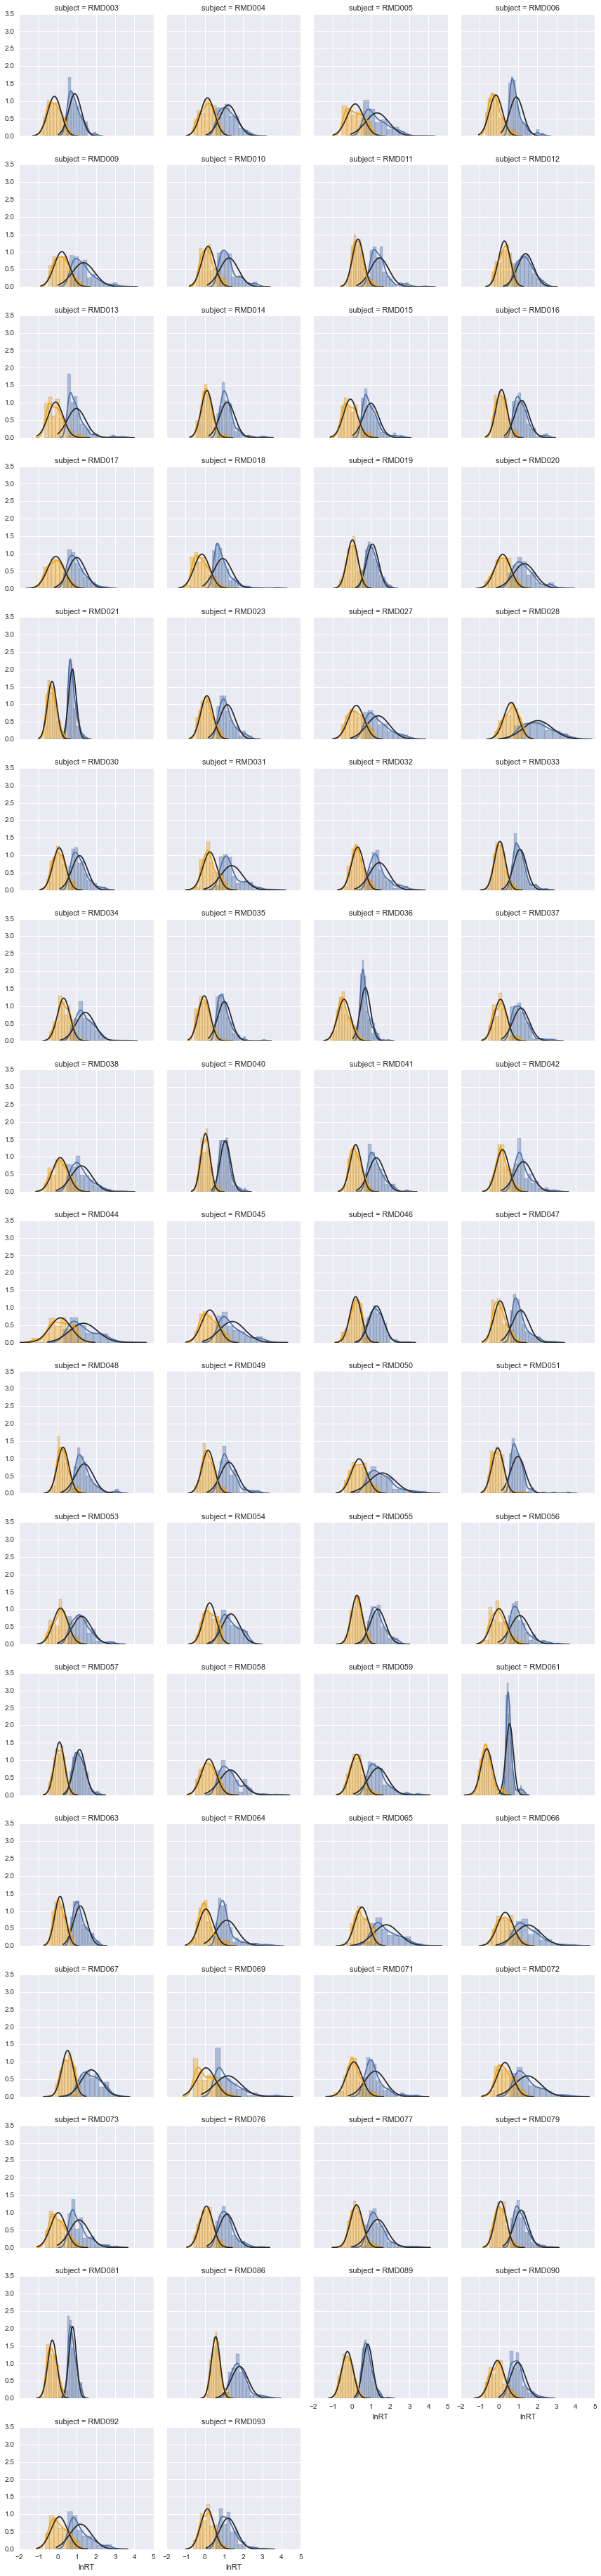

In [85]:
# We don't really need to plot this every time, but I like it because it very clear shows why we do the log transform.
# You can see that the blue distribution doesn't fit the normal distribution well because of the positive skew, which
# leaves the peak shifted left relative to normal. The orange (ln) distribution fits much better for most subjects.

# Single subject data, raw and log transformed RT with normal distribution overlaid.
g = sns.FacetGrid(data=test_clean,col='subject',col_wrap=4)
g.map(sns.distplot,'trial_RT',kde=True,fit=sp.stats.norm) 
g.map(sns.distplot,'lnRT',kde=True,fit=sp.stats.norm,color='orange')

In [86]:
chAavB = test_clean[~(test_clean.trial_type == 'neither')]

In [87]:
# Remember to always check your variables using str in R . . . figured I'd put accuracy in here at the start

%Rpush chAavB
# %R str(test_choice)

%R chAavB_rt.aov <- aov_ez(id='subject', dv='lnRT', data=chAavB, between='group',\
                           within=c('trial_type','trial_accuracy'))
%R print(chAavB_rt.aov) # Main effect of trial type, main effect of accuracy

                           Effect    df  MSE         F    ges p.value
1                           group 1, 44 0.19      0.18   .002     .67
2                      trial_type 1, 44 0.05 13.41 ***    .05   .0007
3                group:trial_type 1, 44 0.05      0.66   .003     .42
4                  trial_accuracy 1, 44 0.03 12.96 ***    .03   .0008
5            group:trial_accuracy 1, 44 0.03      1.53   .003     .22
6       trial_type:trial_accuracy 1, 44 0.05      1.58   .005     .22
7 group:trial_type:trial_accuracy 1, 44 0.05      0.00 <.0001     .97


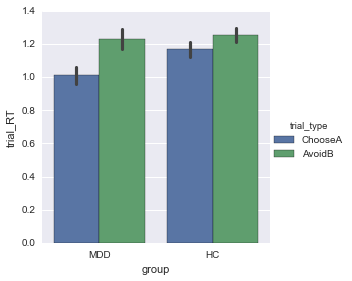

In [88]:
# Let's look at the Group x TT on correct trials . . . if anything, MDD < HC on Choose A (unexpected)

sns.factorplot(y='trial_RT',x='group',hue='trial_type',hue_order=['ChooseA','AvoidB'], units='subject',ci=68,
               kind='bar', data=chAavB[chAavB.trial_accuracy == 1], order = ['MDD','HC'])

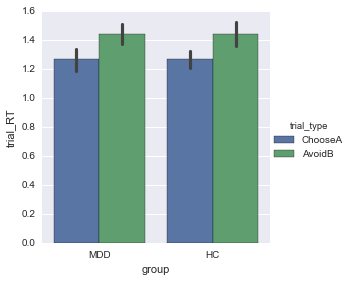

In [89]:
# And error trials . . . interaction seems to disappear here . . . 

sns.factorplot(y='trial_RT',x='group',hue='trial_type',hue_order=['ChooseA','AvoidB'], units='subject',ci=68,
               kind='bar', data=chAavB[chAavB.trial_accuracy == 0], order = ['MDD','HC'])

In [90]:
# Let's get descriptives for the TT effect . . . 
df = misc.MakeFrame(in_df=chAavB,id_vars=['group','subject','trial_type'],dv=['trial_RT','lnRT'])
df.head()

print df.groupby('trial_type')['trial_RT'].mean()
print df.groupby('trial_type')['trial_RT'].std()

trial_type
AvoidB     1.294246
ChooseA    1.135710
Name: trial_RT, dtype: float64
trial_type
AvoidB     0.287260
ChooseA    0.274852
Name: trial_RT, dtype: float64


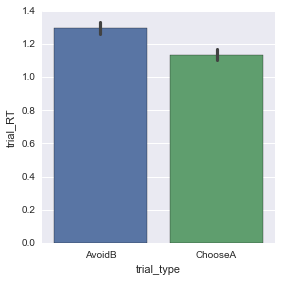

In [91]:
sns.factorplot(y='trial_RT', x='trial_type', units='subject', kind='bar', ci=68, data=df)
sns.plt.savefig(path2figs + 'PST_Test_ChA_vs_AvB_RT.pdf')

In [92]:
# . . . and the accuracy effect . . . accurate decisions are made more quickly.
df = misc.MakeFrame(in_df=chAavB,id_vars=['group','subject','trial_accuracy'],dv=['trial_RT','lnRT'])
df.head()

print df.groupby('trial_accuracy')['trial_RT'].mean()
print df.groupby('trial_accuracy')['trial_RT'].std()

trial_accuracy
0    1.371420
1    1.168415
Name: trial_RT, dtype: float64
trial_accuracy
0    0.371340
1    0.245777
Name: trial_RT, dtype: float64


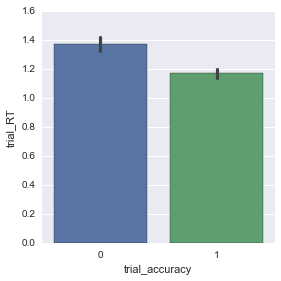

In [93]:
sns.factorplot(y='trial_RT', x='trial_accuracy', units='subject', kind='bar', ci=68, data=df)
sns.plt.savefig(path2figs + 'PST_Test_AccEffect_RT.pdf')

### Accuracy

In [94]:
# No effects at all on accuracy . . . not unusual for there to be no TT effect, was hoping we'd see a Group effect.
%R chAavB_acc.aov <- aov_ez(id='subject',dv='trial_accuracy', within='trial_type', between='group', data=chAavB)
%R print(chAavB_acc.aov)

            Effect    df  MSE    F  ges p.value
1            group 1, 64 0.04 0.58 .003     .45
2       trial_type 1, 64 0.08 0.36 .004     .55
3 group:trial_type 1, 64 0.08 1.12  .01     .29


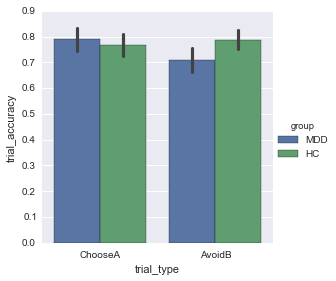

In [95]:
# Nothing doing, and if anything the MDDs are worse on Avoid B . . . interesting, and runs counter to my 
# "number of times you choose B during training predicts Avoid B accuracy at test" hypothesis.

sns.factorplot(y='trial_accuracy',x='trial_type',hue='group',units='subject',ci=68,kind='bar',data=chAavB,
              hue_order = ['MDD','HC'])
sns.plt.savefig(path2figs + 'PST_Test_ChA_vs_AvB_Acc.pdf')

In [96]:
# Typically there's a strong correlation b/w ChA-AvB accuracy and RT diffs at test, let's see if that's true for us

df = misc.MakeFrame(in_df=chAavB,id_vars=['subject','group','trial_type'],dv=['trial_accuracy','trial_RT'])
df.head()

,subject,group,trial_type,trial_accuracy,trial_RT
0,RMD003,MDD,AvoidB,0.729167,0.899667
1,RMD003,MDD,ChooseA,0.416667,1.001396
2,RMD004,HC,AvoidB,0.937500,1.239604
3,RMD004,HC,ChooseA,0.958333,1.117208
4,RMD005,HC,AvoidB,0.979167,1.197042


In [97]:
chA = df[df.trial_type == 'ChooseA']
chA_cols = ['subject','group','trial_type','chA_acc','chA_RT']
chA.columns = chA_cols
chA = chA[['subject','group','chA_acc','chA_RT']]

avB = df[df.trial_type == 'AvoidB']
avB_cols = ['subject','group','trial_type','avB_acc','avB_RT']
avB.columns = avB_cols
avB = avB[['subject','avB_acc','avB_RT']]

both = pd.merge(chA,avB,on='subject')
both['chA_vs_avB_acc'] = both.chA_acc - both.avB_acc
both['chA_vs_avB_RT'] = both.chA_RT - both.avB_RT
both.head()

,subject,group,chA_acc,chA_RT,avB_acc,avB_RT,chA_vs_avB_acc,chA_vs_avB_RT
0,RMD003,MDD,0.416667,1.001396,0.729167,0.899667,-0.312500,0.101729
1,RMD004,HC,0.958333,1.117208,0.937500,1.239604,0.020833,-0.122396
2,RMD005,HC,0.229167,1.352125,0.979167,1.197042,-0.750000,0.155083
3,RMD006,HC,0.958333,0.833187,0.479167,0.926125,0.479167,-0.092938
4,RMD009,HC,0.729167,1.321875,0.979167,1.443562,-0.250000,-0.121688


r = -0.673, p = 6.17e-10


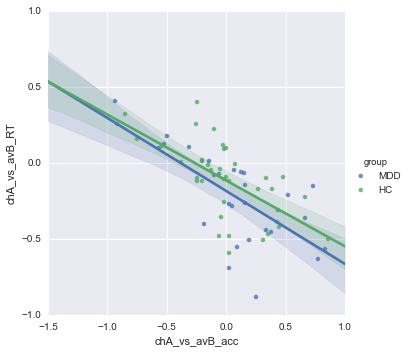

In [98]:
# Yup, as expected--looks good. 
sns.lmplot(y='chA_vs_avB_RT', x='chA_vs_avB_acc', hue='group', data=both)
sns.plt.savefig(path2figs + 'PST_Test_chA_avB_ACC_RT_correl.pdf')

r, p = sp.stats.pearsonr(both.chA_vs_avB_RT,both.chA_vs_avB_acc)
print 'r = ' + '{:.3f}'.format(r) + ', p = ' + '{:.3}'.format(p)

## Comparing win/win, lose/lose, and win/lose trials . . .  

Another thing we can do with the test data . . . win/win (high conflict Go) trials (AC, AE, CE) vs. lose/lose (high conflict NoGo trials) (BD, BF, DF), vs. win/lose (low conflict Go) trials (AD, AF, CB, CF, EB, ED).

In [115]:
test_clean.pair.unique()

array(['AC', 'DF', 'EB', 'ED', 'BD', 'FB', 'CE', 'EF', 'BA', 'AF', 'CD',
       'BC', 'CF', 'AD', 'AE', 'EC', 'BE', 'DA', 'FD', 'BF', 'DE', 'AB',
       'DB', 'FE', 'CB', 'CA', 'FA', 'EA', 'FC', 'DC'], dtype=object)

In [146]:
def CodeConGo(pair):
    '''Code each pair as high conflict Go (win/win), high conflict NoGo (lose/lose), or low conflict Go (win/lose).'''
    
    trained = ['AB','BA','CD','DC','EF','FE']
    ww = ['AC','CA','AE','EA','CE','EC']
    ll = ['BD','DB','BF','FB','DF','FD']
    wl = ['AD','DA','AF','FA','CB','BC','CF','FC','EB','BE','ED','DE']
    
    if pair in trained:
        out = 'trained'
    elif pair in ww:
        out = 'HC_Go'
    elif pair in ll:
        out = 'HC_NoGo'
    elif pair in wl:
        out = 'LC_Go'
    else:
        print "pair = " + pair + "; I don't recognize that pair, stopping!"
        out = 'none'
    
    return out

test_clean['con_trial_type'] = test_clean.pair.apply(CodeConGo) # Conflict trial type

In [147]:
test_clean.con_trial_type

0          HC_Go
1        HC_NoGo
2          LC_Go
3          LC_Go
4        HC_NoGo
5        HC_NoGo
6          HC_Go
7        trained
8        trained
9          LC_Go
10       trained
11         LC_Go
12         LC_Go
13         LC_Go
14         HC_Go
15         HC_Go
16         HC_Go
17         LC_Go
18         LC_Go
19       trained
20         LC_Go
21         HC_Go
22         LC_Go
23       HC_NoGo
24       HC_NoGo
25         LC_Go
26         LC_Go
27       trained
28       trained
29       HC_NoGo
30       trained
31         LC_Go
32       trained
33         LC_Go
34         HC_Go
35         LC_Go
36         HC_Go
37       HC_NoGo
38         HC_Go
39         LC_Go
40       trained
41       HC_NoGo
42         LC_Go
43       HC_NoGo
44         LC_Go
45       HC_NoGo
46       trained
47         LC_Go
48       HC_NoGo
49         HC_Go
50       trained
51         HC_Go
52       HC_NoGo
53         LC_Go
54         LC_Go
55       trained
56         LC_Go
57         LC_Go
58         HC_

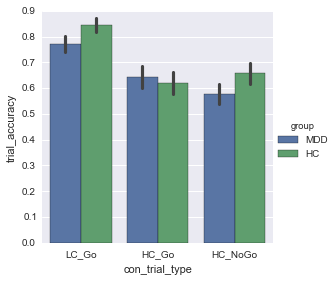

In [127]:
# Accuracy
sns.factorplot(y='trial_accuracy',x='con_trial_type',hue='group',units='subject',ci=68,kind='bar',
               x_order=['LC_Go','HC_Go','HC_NoGo'], data=test_clean)

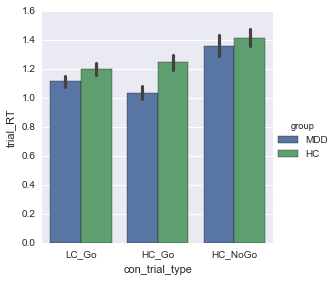

In [128]:
# Correct RT
sns.factorplot(y='trial_RT',x='con_trial_type',hue='group',units='subject',ci=68,kind='bar',
               x_order=['LC_Go','HC_Go','HC_NoGo'], data=test_clean[test_clean.trial_accuracy == 1])

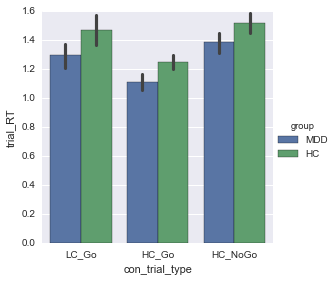

In [129]:
# Error RT
sns.factorplot(y='trial_RT',x='con_trial_type',hue='group',units='subject',ci=68,kind='bar',
               x_order=['LC_Go','HC_Go','HC_NoGo'], data=test_clean[test_clean.trial_accuracy == 0])

In [130]:
test_clean.con_trial_type = test_clean.con_trial_type.astype(str)
con_test = test_clean[~(test_clean.con_trial_type == 'nan')]

%Rpush con_test
# %R str(con_test)

%R con_acc.aov <- aov_ez(id='subject',dv='trial_accuracy',within='con_trial_type',between='group',data=con_test)
%R print(con_acc.aov) # Strong effect of trial type, nothing with group . . . 

%R con_RT.aov <- aov_ez(id='subject',dv='trial_RT',within=c('con_trial_type','trial_accuracy'),\
                        between='group',data=con_test)

%R print(con_RT.aov) # Effects of Trial Type and Accuracy, plus Group x TT and TT x Accuracy interactions . . . 

                Effect           df  MSE         F  ges p.value
1                group        1, 74 0.07      2.48  .01     .12
2       con_trial_type 2.03, 150.13 0.06 21.33 ***  .16  <.0001
3 group:con_trial_type 2.03, 150.13 0.06      0.99 .009     .38


                               Effect           df  MSE         F  ges p.value
1                               group        1, 47 0.69    6.65 *  .08     .01
2                      con_trial_type 2.76, 129.58 0.07  9.85 ***  .03  <.0001
3                group:con_trial_type 2.76, 129.58 0.07      1.01 .004     .39
4                      trial_accuracy        1, 47 0.07 32.86 ***  .04  <.0001
5                group:trial_accuracy        1, 47 0.07  10.80 **  .01    .002
6       con_trial_type:trial_accuracy 2.81, 132.28 0.06  7.65 ***  .02   .0001
7 group:con_trial_type:trial_accuracy 2.81, 132.28 0.06      1.93 .006     .13


There's probably more we can do here, pausing for now . . . 

In [131]:
train_acc = misc.MakeFrame(in_df=train_data,id_vars='subject',dv='accuracy',agg_func='mean')
new_cols = ['subject','train_acc']
train_acc.columns = new_cols
train_acc.head()

,subject,train_acc
0,RMD001,12.022222
1,RMD002,4.754167
2,RMD003,4.979167
3,RMD004,13.250000
4,RMD005,13.025000


In [150]:
test2 = pd.merge(test_clean,train_acc,on='subject')
test2.head()

,subject,group,block_id,trial_id,trial_RT,lnRT,trial_accuracy,left_stim_name,left_stim_number,right_stim_name,right_stim_number,response,Group,Age,Gender,Race,Ethnicity,Marital_Status,Education_Level,Education_Years,Occupation,Highest Degree,Income,Eligible,BDI_total,CC_total,BAS_D,BAS_FS,BAS_RR,BIS,MASQ_GDA,MASQ_AA,MASQ_GDD,MASQ_AD,AES_total,STAI_Trait,STAI_State,SHAPS,PSQI_Duration,PSQI_Disturb,PSQI_Latency,PSQI_DayDys,PSQI_Efficiency,PSQI_Quality,PSQI_Medication,PSQI_Total,TCI_NovSeek,TCI_HA,TCI_RewDep,TCI_Persist,TCI_SelfDir,TCI_CoOp,TCI_SelfTrans,TCI_Valid,NEO_N,NEO_E,NEO_O,NEO_A,NEO_C,POMS_TenseAnx,POMS_DepDeject,POMS_AngHost,POMS_VigorAct,POMS_FatigueInert,POMS_ConfuseBewild,POMS_TotalMoodDisturb,WTAR_NatEng,WTAR_StdScore,outlier,pair,trial_type,trial_type_redux,difference,choice,con_trial_type,train_acc
0,RMD003,MDD,1,1,1.394,0.332177,0,Stimuli/6.bmp,1,Stimuli/1.bmp,2,right,MDD,43,F,W,NH,Separated,technical college,12,chef,nan,nan,1,18,13,14,13,19,25,23,18,28,91,44,41,68,2,1,2,2,0,1,1,1,8,67,93,75,77,54,50,35,valid,46,25,38,40,49,9,13,12,1,7,4,44,yes,96,0,AC,ChooseA,ChooseA,10,C,HC_Go,4.979167
1,RMD003,MDD,1,2,1.996,0.691145,1,Stimuli/5.bmp,5,Stimuli/2.bmp,4,right,MDD,43,F,W,NH,Separated,technical college,12,chef,nan,nan,1,18,13,14,13,19,25,23,18,28,91,44,41,68,2,1,2,2,0,1,1,1,8,67,93,75,77,54,50,35,valid,46,25,38,40,49,9,13,12,1,7,4,44,yes,96,0,DF,neither,neither,10,F,HC_NoGo,4.979167
2,RMD003,MDD,1,3,1.247,0.220741,1,Stimuli/4.bmp,3,Stimuli/3.bmp,6,left,MDD,43,F,W,NH,Separated,technical college,12,chef,nan,nan,1,18,13,14,13,19,25,23,18,28,91,44,41,68,2,1,2,2,0,1,1,1,8,67,93,75,77,54,50,35,valid,46,25,38,40,49,9,13,12,1,7,4,44,yes,96,0,EB,AvoidB,AvoidB,40,E,LC_Go,4.979167
3,RMD003,MDD,1,4,1.195,0.178146,1,Stimuli/4.bmp,3,Stimuli/5.bmp,5,left,MDD,43,F,W,NH,Separated,technical college,12,chef,nan,nan,1,18,13,14,13,19,25,23,18,28,91,44,41,68,2,1,2,2,0,1,1,1,8,67,93,75,77,54,50,35,valid,46,25,38,40,49,9,13,12,1,7,4,44,yes,96,0,ED,neither,neither,30,E,LC_Go,4.979167
4,RMD003,MDD,1,5,1.414,0.346423,0,Stimuli/3.bmp,6,Stimuli/5.bmp,5,left,MDD,43,F,W,NH,Separated,technical college,12,chef,nan,nan,1,18,13,14,13,19,25,23,18,28,91,44,41,68,2,1,2,2,0,1,1,1,8,67,93,75,77,54,50,35,valid,46,25,38,40,49,9,13,12,1,7,4,44,yes,96,0,BD,AvoidB,AvoidB,10,B,HC_NoGo,4.979167


In [151]:
test2_HC = test2[test2.group == 'HC']

In [152]:
test2_MDD = test2[test2.group == 'MDD']

In [175]:
true_test_HC = test2_HC[~(test2_HC.con_trial_type == 'trained')] # Drop the trained pairs
true_test_HC.head()
df_HC = misc.MakeFrame(in_df=true_test_HC,id_vars=['subject','difference','train_acc'],dv='trial_accuracy',agg_func='mean')
df_HC.head(8)

,subject,difference,train_acc,trial_accuracy
0,RMD004,10,13.250,0.750000
1,RMD004,20,13.250,0.875000
2,RMD004,30,13.250,1.000000
3,RMD004,40,13.250,1.000000
4,RMD004,50,13.250,1.000000
5,RMD005,10,13.025,0.520833
6,RMD005,20,13.025,0.583333
7,RMD005,30,13.025,0.608696


(0.0, 1.0)

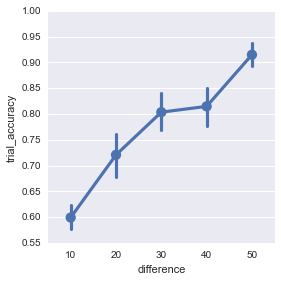

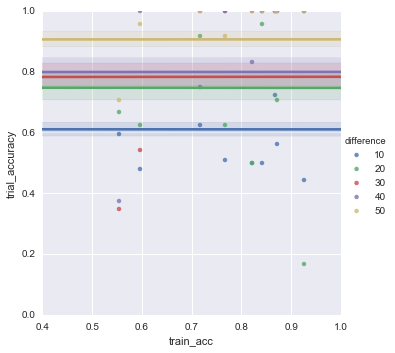

In [178]:
sns.factorplot(y='trial_accuracy',x='difference',units='subject',ci=68,data=df_HC)
sns.lmplot(y='trial_accuracy',x='train_acc',logistic=True,hue='difference',units='subject',ci=68,data=df_HC)
sns.plt.xlim(0.4,1.0)
sns.plt.ylim(0.0,1.0)

In [171]:
test2_HC.con_trial_type = test2_HC.con_trial_type.astype(str)
%Rpush test2_HC

%R test2_HC$difference <- scale(test2_HC$difference)

%R test_acc_c.fm1 <- glmer(trial_accuracy ~  difference + (1|subject), family=binomial, data=test2_HC)
%R test_acc_c.fm2 <- glmer(trial_accuracy ~  difference + train_acc + (1|subject), family=binomial, data=test2_HC)
%R test_acc_c.fm3 <- glmer(trial_accuracy ~  difference*train_acc + (1|subject), family=binomial, data=test2_HC)

%R test_acc_c.aov <- anova(test_acc_c.fm1,test_acc_c.fm2,test_acc_c.fm3)
%R print(test_acc_c.aov)
%R print(summary(test_acc_c.fm3))

Data: test2_HC
Models:
test_acc_c.fm1: trial_accuracy ~ difference + (1 | subject)
test_acc_c.fm2: trial_accuracy ~ difference + train_acc + (1 | subject)
test_acc_c.fm3: trial_accuracy ~ difference * train_acc + (1 | subject)
               Df    AIC    BIC  logLik deviance  Chisq Chi Df Pr(>Chisq)  
test_acc_c.fm1  3 6757.7 6778.4 -3375.9   6751.7                           
test_acc_c.fm2  4 6759.7 6787.2 -3375.8   6751.7 0.0802      1    0.77708  
test_acc_c.fm3  5 6755.3 6789.7 -3372.7   6745.3 6.3237      1    0.01191 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: trial_accuracy ~ difference * train_acc + (1 | subject)
   Data: test2_HC

     AIC      BIC   logLik deviance df.resid 
  6755.3   6789.7  -3372.7   6745.3     7151 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-7.6374  0.1237  0.3371  0.5454  1.5275 

Random effects:
 Groups  Name        Variance Std.Dev.
 subject (Intercept) 0.7299   0.8543  
Number of obs: 7156, groups:  subject, 40

Fixed effects:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)          1.4264452  0.1644639   8.673   <2e-16 ***
difference           0.7289989  0.0411124  17.732   <2e-16 ***
train_acc            0.0018763  0.0031298   0.600   0.5488    
difference:train_acc 0.0021723  0.0008897   2.442   0.0146 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr) dffrnc trn_cc


In [174]:
true_test_MDD = test2_MDD[~(test2_MDD.con_trial_type == 'trained')] # Drop the trained pairs

df_MDD = misc.MakeFrame(in_df=true_test_MDD,id_vars=['subject','difference','train_acc'],dv='trial_accuracy',agg_func='mean')
df_MDD.head(8)

,subject,difference,train_acc,trial_accuracy
0,RMD003,10,4.979167,0.395833
1,RMD003,20,4.979167,0.375000
2,RMD003,30,4.979167,0.833333
3,RMD003,40,4.979167,0.750000
4,RMD003,50,4.979167,0.791667
5,RMD013,10,29.904167,0.625000
6,RMD013,20,29.904167,0.956522
7,RMD013,30,29.904167,0.958333


(0.0, 1.0)

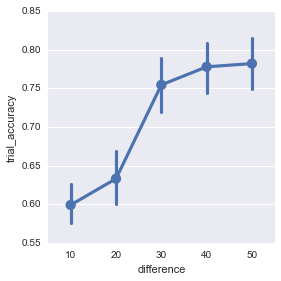

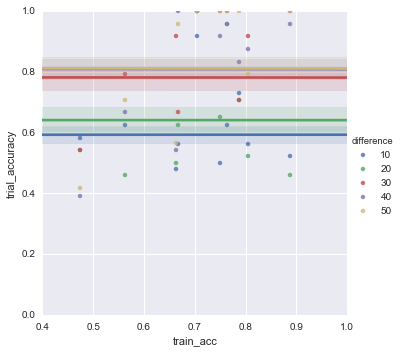

In [179]:
sns.factorplot(y='trial_accuracy',x='difference',units='subject',ci=68,data=df_MDD)
sns.lmplot(y='trial_accuracy',x='train_acc',hue='difference',logistic=True,units='subject',ci=68,data=df_MDD)
sns.plt.xlim(0.4,1.0)
sns.plt.ylim(0.0,1.0)

In [172]:
test2_MDD.con_trial_type = test2_MDD.con_trial_type.astype(str)
%Rpush test2_MDD

%R test2_MDD$difference <- scale(test2_MDD$difference)
# %R str(test)

%R test_acc_M.fm1 <- glmer(trial_accuracy ~  difference + (1|subject), family=binomial, data=test2_MDD)
%R test_acc_M.fm2 <- glmer(trial_accuracy ~  difference + train_acc + (1|subject), family=binomial, data=test2_MDD)
%R test_acc_M.fm3 <- glmer(trial_accuracy ~  difference*train_acc + (1|subject), family=binomial, data=test2_MDD)

%R test_acc_M.aov <- anova(test_acc_M.fm1,test_acc_M.fm2,test_acc_M.fm3)
%R print(test_acc_M.aov)
%R print(summary(test_acc_M.fm3))

Data: test2_MDD
Models:
test_acc_M.fm1: trial_accuracy ~ difference + (1 | subject)
test_acc_M.fm2: trial_accuracy ~ difference + train_acc + (1 | subject)
test_acc_M.fm3: trial_accuracy ~ difference * train_acc + (1 | subject)
               Df    AIC    BIC  logLik deviance   Chisq Chi Df Pr(>Chisq)    
test_acc_M.fm1  3 7073.5 7093.8 -3533.8   7067.5                              
test_acc_M.fm2  4 7073.5 7100.6 -3532.8   7065.5  1.9962      1     0.1577    
test_acc_M.fm3  5 7041.5 7075.4 -3515.8   7031.5 33.9634      1  5.616e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: trial_accuracy ~ difference * train_acc + (1 | subject)
   Data: test2_MDD

     AIC      BIC   logLik deviance df.resid 
  7041.5   7075.4  -3515.8   7031.5     6446 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.6643 -0.9899  0.4102  0.6603  1.5224 

Random effects:
 Groups  Name        Variance Std.Dev.
 subject (Intercept) 0.5855   0.7652  
Number of obs: 6451, groups:  subject, 36

Fixed effects:
                       Estimate Std. Error z value Pr(>|z|)    
(Intercept)           1.1783967  0.1500534   7.853 4.06e-15 ***
difference            0.5521689  0.0357659  15.438  < 2e-16 ***
train_acc            -0.0039167  0.0025973  -1.508    0.132    
difference:train_acc -0.0030799  0.0005262  -5.853 4.81e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr) dffrnc t

## Modeling 

In [106]:
%cd ~/Work/Expts/Code
import RL_fit

/Users/ebarrick/Work/Expts/Code


In [107]:
s3 = train_clean[train_clean.subject == 'RMD003']
